In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import yfinance as yf

In [2]:
# Set the working directory
os.chdir(r"D:\Benson\aUpWork\Douglas Backtester Algo\Backtester Algorithm\Data")

In [3]:
# Load the CSV file
file_path = r"YMAX ETF Stock Price History.csv"
YMAX = pd.read_csv(file_path)

# Display the first few rows
YMAX.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/28/2025,16.72,16.57,16.73,16.33,950.74K,1.95%
1,01/27/2025,16.40,16.44,16.62,16.23,2.56M,-2.90%
2,01/24/2025,16.89,17.00,17.08,16.86,1.39M,-0.41%
3,01/23/2025,16.96,16.80,16.97,16.77,1.03M,-0.41%
4,01/22/2025,17.03,17.04,17.09,16.97,1.47M,0.89%


In [4]:
# Load the CSV file
file_path = r"YMAG ETF Stock Price History.csv"
YMAG = pd.read_csv(file_path)

# Display the first few rows
YMAG.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/28/2025,18.81,18.48,18.83,18.35,933.82K,2.28%
1,01/27/2025,18.39,18.27,18.53,18.18,1.25M,-2.85%
2,01/24/2025,18.93,19.00,19.07,18.83,848.88K,-0.05%
3,01/23/2025,18.94,18.94,18.97,18.85,585.19K,-0.63%
4,01/22/2025,19.06,18.94,19.09,18.90,622.02K,0.85%


In [5]:
#Convert dates to their right format in both YMAX and YMAG DataFrames
YMAG['Date'] = pd.to_datetime(YMAG['Date'])
YMAX['Date'] = pd.to_datetime(YMAX['Date'])
YMAX = YMAX.set_index('Date')
YMAG = YMAG.set_index('Date')

In [6]:
# Drop columns Vol and Change in both YMAX and YMAG DataFrames
YMAX = YMAX.drop(columns=['Vol.', 'Change %'])
YMAG = YMAG.drop(columns=['Vol.', 'Change %'])

In [7]:
#View the first few rows of the YMAX DataFrame
YMAX.head()

,Price,Open,High,Low
Date,,,,
2025-01-28,16.72,16.57,16.73,16.33
2025-01-27,16.40,16.44,16.62,16.23
2025-01-24,16.89,17.00,17.08,16.86
2025-01-23,16.96,16.80,16.97,16.77
2025-01-22,17.03,17.04,17.09,16.97


In [8]:
#View the first few rows of the YMAG DataFrame
YMAG.head()

,Price,Open,High,Low
Date,,,,
2025-01-28,18.81,18.48,18.83,18.35
2025-01-27,18.39,18.27,18.53,18.18
2025-01-24,18.93,19.00,19.07,18.83
2025-01-23,18.94,18.94,18.97,18.85
2025-01-22,19.06,18.94,19.09,18.90


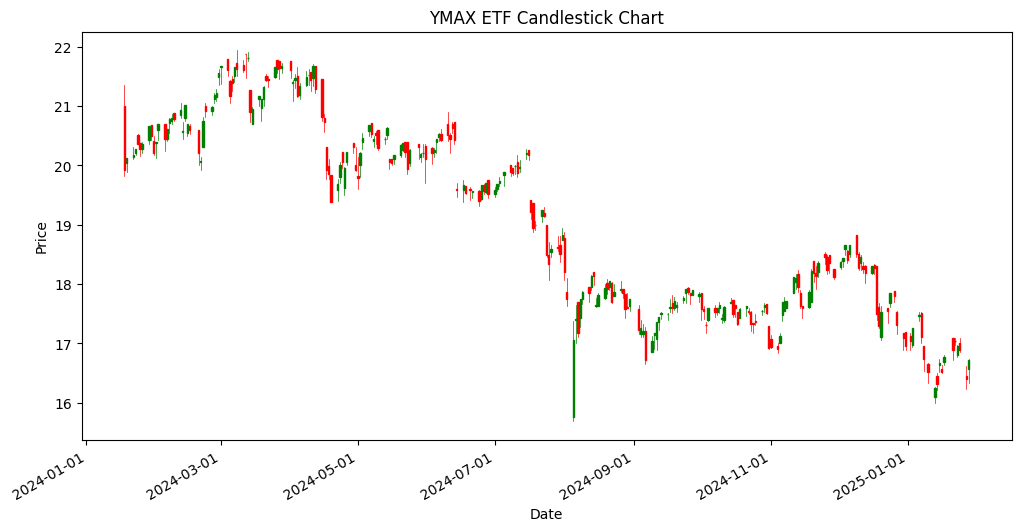

In [9]:
# Convert Date index to datetime format
YMAX.index = pd.to_datetime(YMAX.index)

# Convert dates to numerical format for matplotlib
YMAX['Date'] = YMAX.index.map(mdates.date2num)

# Select required columns for candlestick_ohlc
ohlc = YMAX[['Date', 'Open', 'High', 'Low', 'Price']].copy()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Format the x-axis dates to avoid clutter
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto-adjust date intervals
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as YYYY-MM-DD

# Plot the candlestick chart
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')

# Labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('YMAX ETF Candlestick Chart')

# Rotate x-axis labels for better readability
fig.autofmt_xdate()

# Show the plot
plt.show()


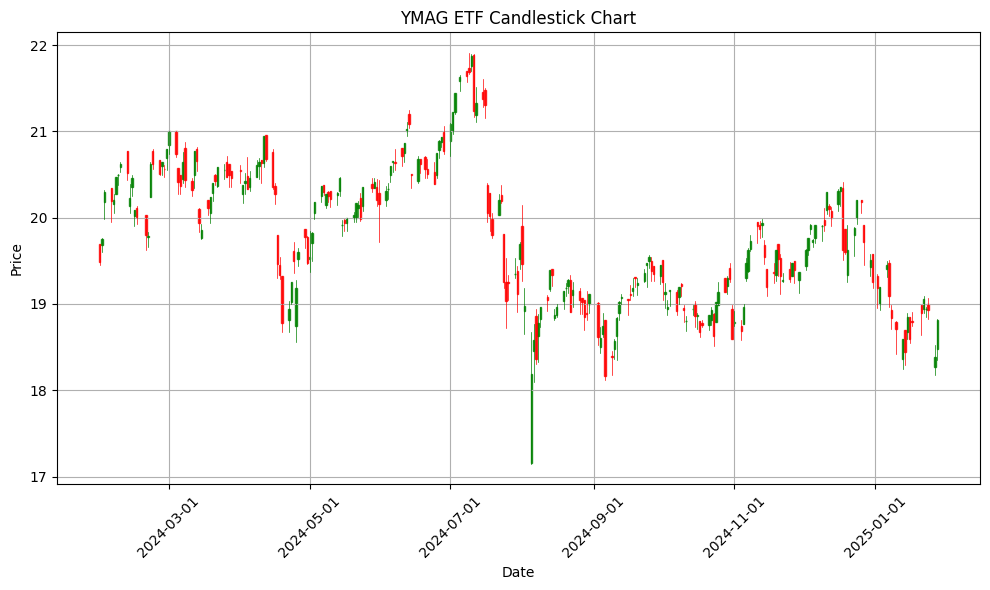

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Assume YMAG is your DataFrame with columns 'Open', 'High', 'Low', and 'Price'
# and its index contains date information.

# Convert index to datetime if it's not already
YMAG.index = pd.to_datetime(YMAG.index)

# Reset the index so that the dates become a column,
# and rename the index column to "Date" for clarity.
data = YMAG.reset_index().rename(columns={'index': 'Date'})

# Convert dates to Matplotlib’s numeric format
data['Date'] = data['Date'].map(mdates.date2num)

# Prepare the quotes array: each row is [date, open, high, low, close]
quotes = data[['Date', 'Open', 'High', 'Low', 'Price']].values

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the candlestick chart
candlestick_ohlc(ax, quotes, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Format the x-axis with date labels
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Set titles and labels
plt.title("YMAG ETF Candlestick Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()

# Display the chart
plt.show()


In [11]:
# Drop Open, High, Low columns and rename Price to YMAX in YMAX DataFrame
YMAX = YMAX.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAX'})

# Drop Open, High, Low columns and rename Price to YMAG in YMAG DataFrame
YMAG = YMAG.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAG'})

# Ensure the Date index is set properly and drop any residual "Date" columns if present
if 'Date' in YMAX.columns:
    YMAX = YMAX.drop(columns=['Date'])

if 'Date' in YMAG.columns:
    YMAG = YMAG.drop(columns=['Date'])

# Merge both dataframes on the Date index
YMAX_YMAG_df = pd.merge(YMAX, YMAG, left_index=True, right_index=True, how='inner')
YMAX_YMAG_merged = YMAX_YMAG_df.copy()

# Display the corrected merged DataFrame
YMAX_YMAG_df.head()

,YMAX,YMAG
Date,,
2025-01-28,16.72,18.81
2025-01-27,16.40,18.39
2025-01-24,16.89,18.93
2025-01-23,16.96,18.94
2025-01-22,17.03,19.06


In [12]:
#Compute the sum of Missing values in the YMAX_YMAG DataFrame, if zero then there are no missing values
YMAX_YMAG_df.isnull().sum()

YMAX    0
YMAG    0
dtype: int64

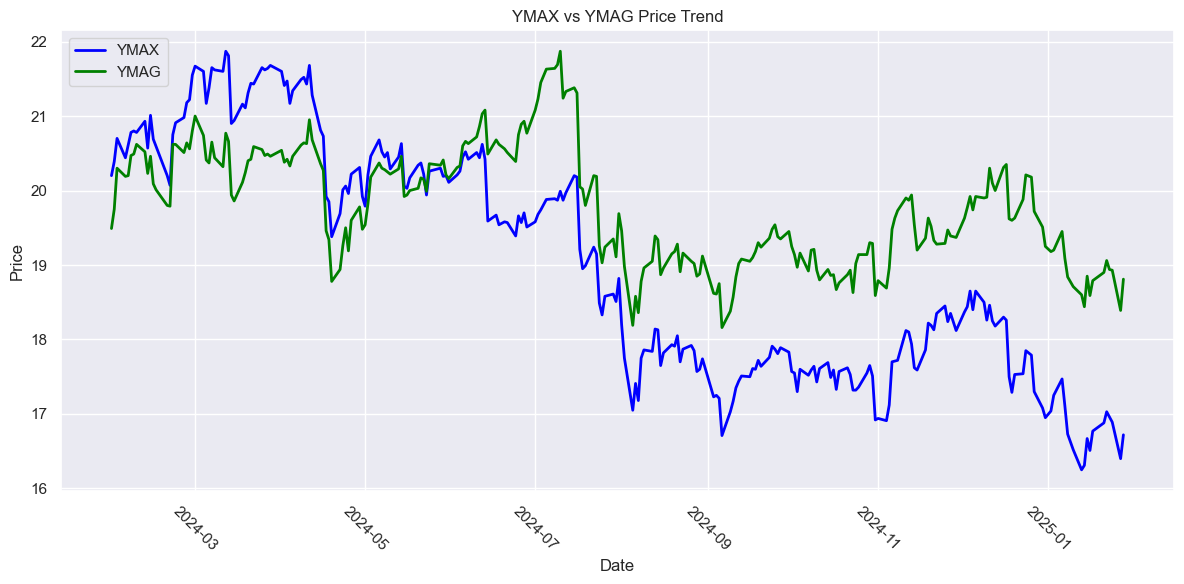

In [13]:

# Optional: Set a dark theme (similar to Plotly's dark mode)
sns.set_theme(style="darkgrid")  # You can remove this if you prefer the default style

# Ensure the DataFrame index is in datetime format
YMAX_YMAG_df.index = pd.to_datetime(YMAX_YMAG_df.index)

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the YMAX line (blue)
plt.plot(YMAX_YMAG_df.index, YMAX_YMAG_df["YMAX"], color="blue", label="YMAX", linewidth=2)

# Plot the YMAG line (green)
plt.plot(YMAX_YMAG_df.index, YMAX_YMAG_df["YMAG"], color="green", label="YMAG", linewidth=2)

# Set title and axis labels
plt.title("YMAX vs YMAG Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")

# Rotate x-axis labels for better readability
plt.xticks(rotation=-45)

# Place the legend at the top-left
plt.legend(loc="upper left")

# Adjust layout for a neat appearance
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# Define rolling window size (e.g., 20 days)
window_size = 21

# Compute daily returns
returns = YMAX_YMAG_df.pct_change().dropna()

# Compute rolling volatilities (standard deviation of returns)
YMAX_YMAG_df["YMAX Volatility"] = returns["YMAX"].rolling(window=window_size).std()
YMAX_YMAG_df["YMAG Volatility"] = returns["YMAG"].rolling(window=window_size).std()

# Compute rolling correlation
YMAX_YMAG_df["Rolling Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["YMAG"])

# Drop NaN values resulting from rolling calculations
YMAX_YMAG_df = YMAX_YMAG_df.dropna()

YMAX_YMAG_df

,YMAX,YMAG,YMAX Volatility,YMAG Volatility,Rolling Correlation
Date,,,,,
2024-12-24,17.85,20.21,0.015455,0.013680,0.920583
2024-12-23,17.54,19.88,0.015331,0.013166,0.922149
2024-12-20,17.53,19.63,0.014083,0.012243,0.883521
2024-12-19,17.29,19.60,0.014471,0.012262,0.873417
2024-12-18,17.50,19.62,0.014662,0.012216,0.859698
...,...,...,...,...,...
2024-02-06,20.61,20.20,0.013439,0.013328,0.871627
2024-02-05,20.44,20.19,0.013310,0.013012,0.862776
2024-02-02,20.70,20.30,0.013559,0.013065,0.871646


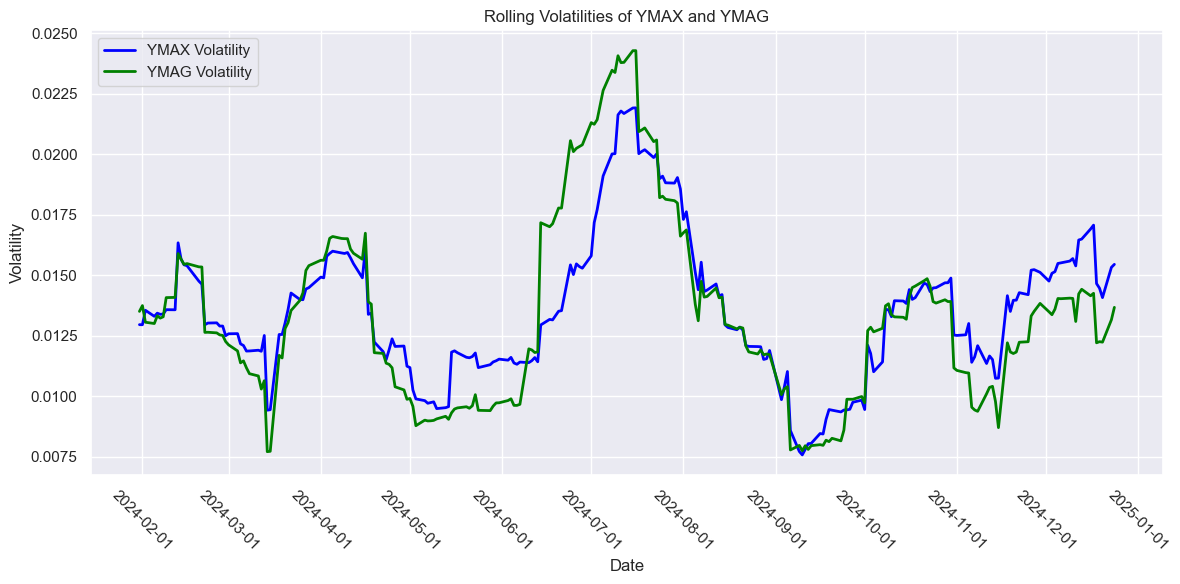

In [15]:
# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
YMAX_YMAG_df.index = pd.to_datetime(YMAX_YMAG_df.index)

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot YMAX Volatility (blue)
plt.plot(YMAX_YMAG_df.index, YMAX_YMAG_df["YMAX Volatility"], color="blue", label="YMAX Volatility", linewidth=2)

# Plot YMAG Volatility (green)
plt.plot(YMAX_YMAG_df.index, YMAX_YMAG_df["YMAG Volatility"], color="green", label="YMAG Volatility", linewidth=2)

# Set title and axis labels
plt.title("Rolling Volatilities of YMAX and YMAG")
plt.xlabel("Date")
plt.ylabel("Volatility")

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=-45)

# Position the legend at the top-left
plt.legend(loc="upper left")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


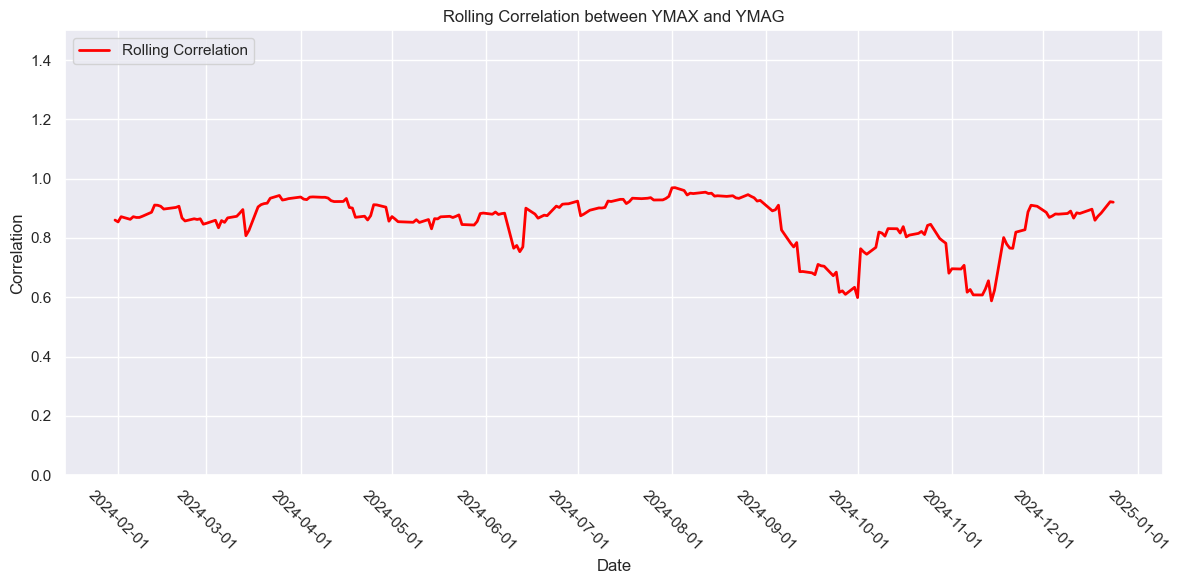

In [16]:
# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")  # You can remove or change this style if you prefer

# Ensure the DataFrame index is in datetime format
YMAX_YMAG_df.index = pd.to_datetime(YMAX_YMAG_df.index)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Rolling Correlation (red)
ax.plot(YMAX_YMAG_df.index, YMAX_YMAG_df["Rolling Correlation"], color="red", label="Rolling Correlation", linewidth=2)

# Set title and axis labels
ax.set_title("Rolling Correlation between YMAX and YMAG")
ax.set_xlabel("Date")
ax.set_ylabel("Correlation")

# Set the y-axis range to [0, 1.5]
ax.set_ylim([0, 1.5])

# Format the x-axis dates: auto locator and formatter
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=-45)

# Position the legend at the top-left
ax.legend(loc="upper left")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [17]:
# Download the data of VIX, VVIX, and QQQ ETF
VIX = yf.download('^VIX', start='2024-01-01', end='2025-01-30')
VVIX = yf.download('^VVIX', start='2024-01-01', end='2025-01-30')
QQQ = yf.download('QQQ', start='2024-01-01', end='2025-01-30')

# Rename the columns
VIX.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
VVIX.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
QQQ.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


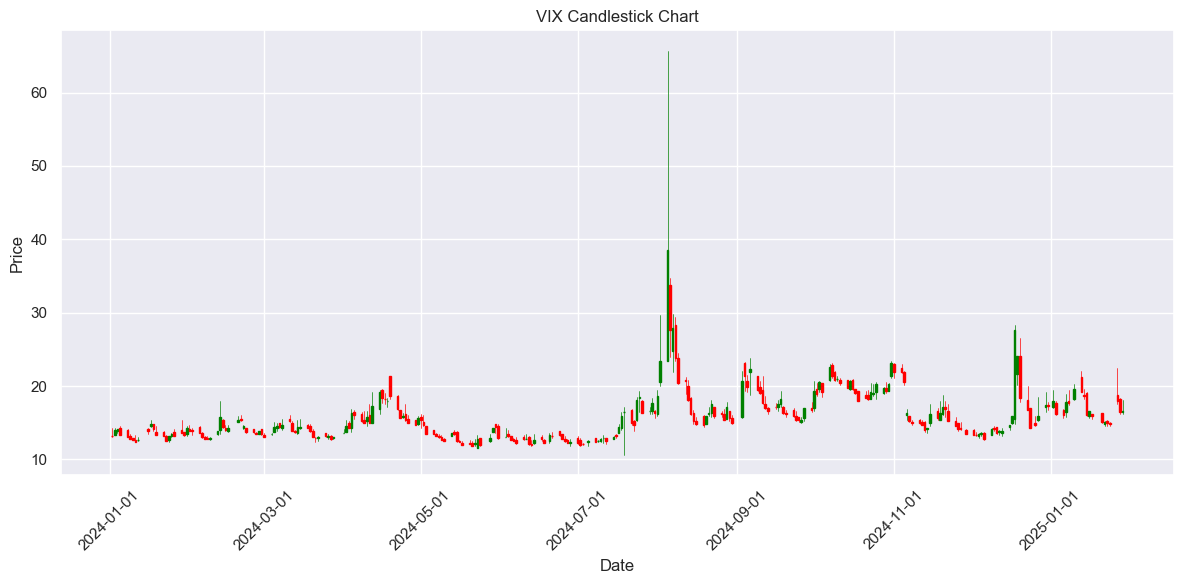

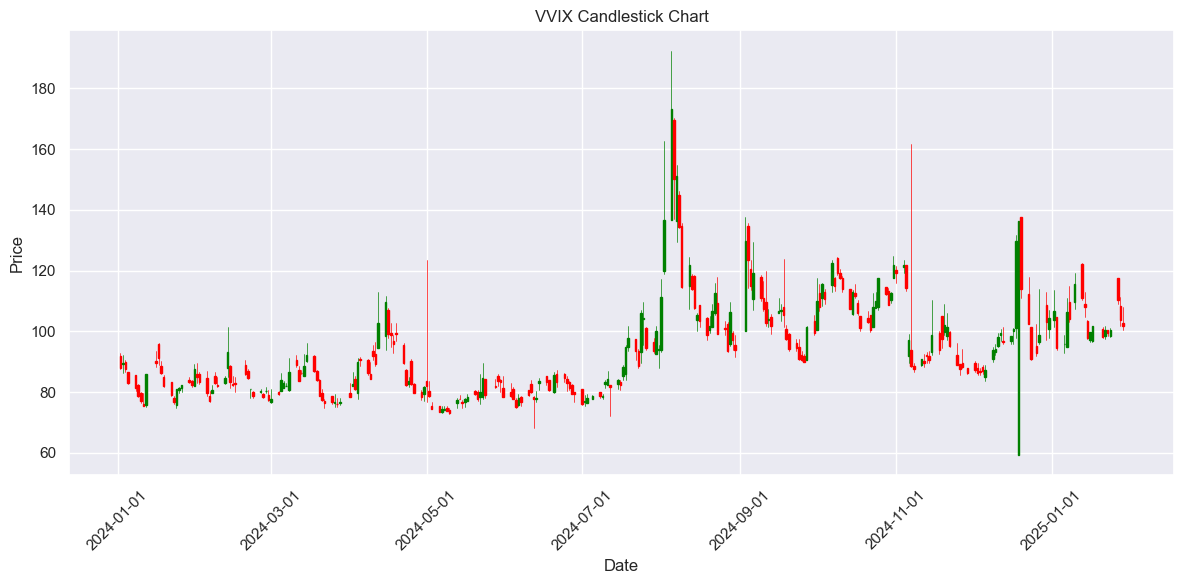

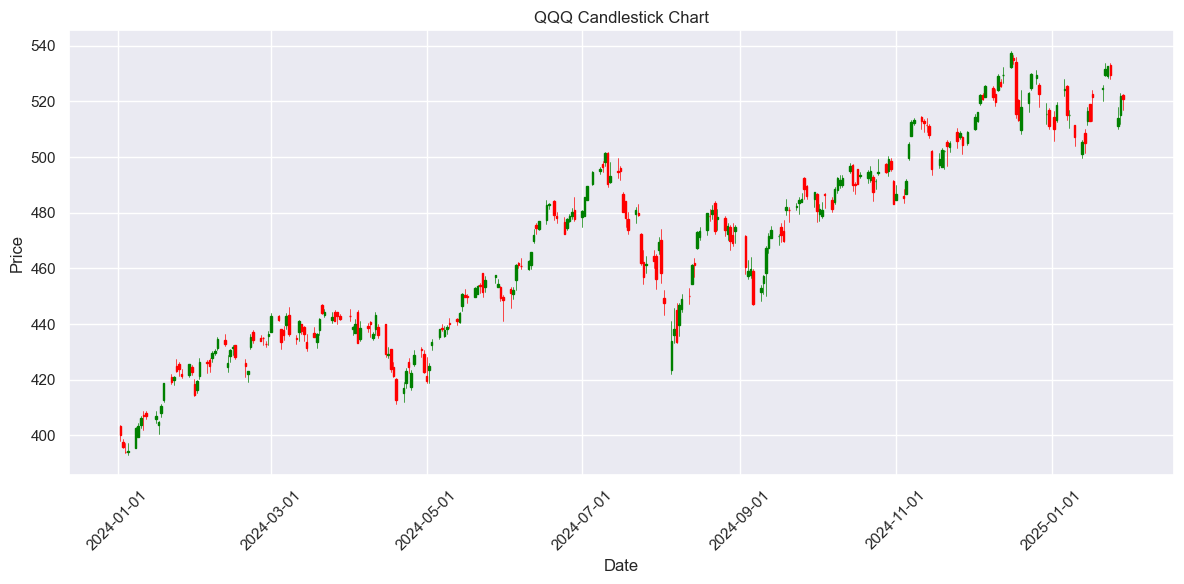

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# Function to create a candlestick chart using Matplotlib
def create_candlestick_chart(df, title):
    # Ensure the index is datetime
    df.index = pd.to_datetime(df.index)
    
    # Create a new 'Date' column with numerical values for Matplotlib
    df['Date'] = df.index.map(mdates.date2num)
    
    # Prepare the OHLC data: Date, Open, High, Low, Close
    ohlc = df[['Date', 'Open', 'High', 'Low', 'Close']].copy()
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the candlestick chart
    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
    
    # Format the x-axis to display dates properly
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    
    # Set the title and axis labels
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
    plt.tight_layout()
    plt.show()

# Create charts for each asset (Assuming VIX, VVIX, and QQQ DataFrames contain the columns: Open, High, Low, Close)
create_candlestick_chart(VIX, "VIX Candlestick Chart")
create_candlestick_chart(VVIX, "VVIX Candlestick Chart")
create_candlestick_chart(QQQ, "QQQ Candlestick Chart")


In [19]:
# Rename "Close" column and drop other columns
VIX = VIX[['Close']].rename(columns={'Close': 'VIX'})
VVIX = VVIX[['Close']].rename(columns={'Close': 'VVIX'})
QQQ = QQQ[['Close']].rename(columns={'Close': 'QQQ'})

# Merge VIX, VVIX, and QQQ DataFrames on the Date index
merged_vix_vvix_qqq_df = VIX \
    .merge(VVIX, left_index=True, right_index=True, how='outer') \
    .merge(QQQ, left_index=True, right_index=True, how='outer')

# Merge the VIX, VVIX, and QQQ DataFrames with the YMAX_YMAG_merged DataFrame
merged_df = YMAX_YMAG_merged.merge(
    merged_vix_vvix_qqq_df, left_index=True, right_index=True, how='outer'
)

#Drop the NaN values
merged_df = merged_df.dropna()
merged_df

,YMAX,YMAG,VIX,VVIX,QQQ
Date,,,,,
2024-01-31,20.20,19.49,14.35,87.559998,414.506744
2024-02-01,20.39,19.75,13.88,84.830002,419.387726
2024-02-02,20.70,20.30,13.85,83.309998,426.475616
2024-02-05,20.44,20.19,13.67,79.580002,425.918945
2024-02-06,20.61,20.20,13.06,76.970001,425.063965
...,...,...,...,...,...
2025-01-22,17.03,19.06,15.10,100.559998,531.510010
2025-01-23,16.96,18.94,15.02,99.519997,532.640015
2025-01-24,16.89,18.93,14.85,100.410004,529.630005


In [20]:
# Exporting the prices to a csv
merged_df.to_csv('All assets Prices.csv', index=True)

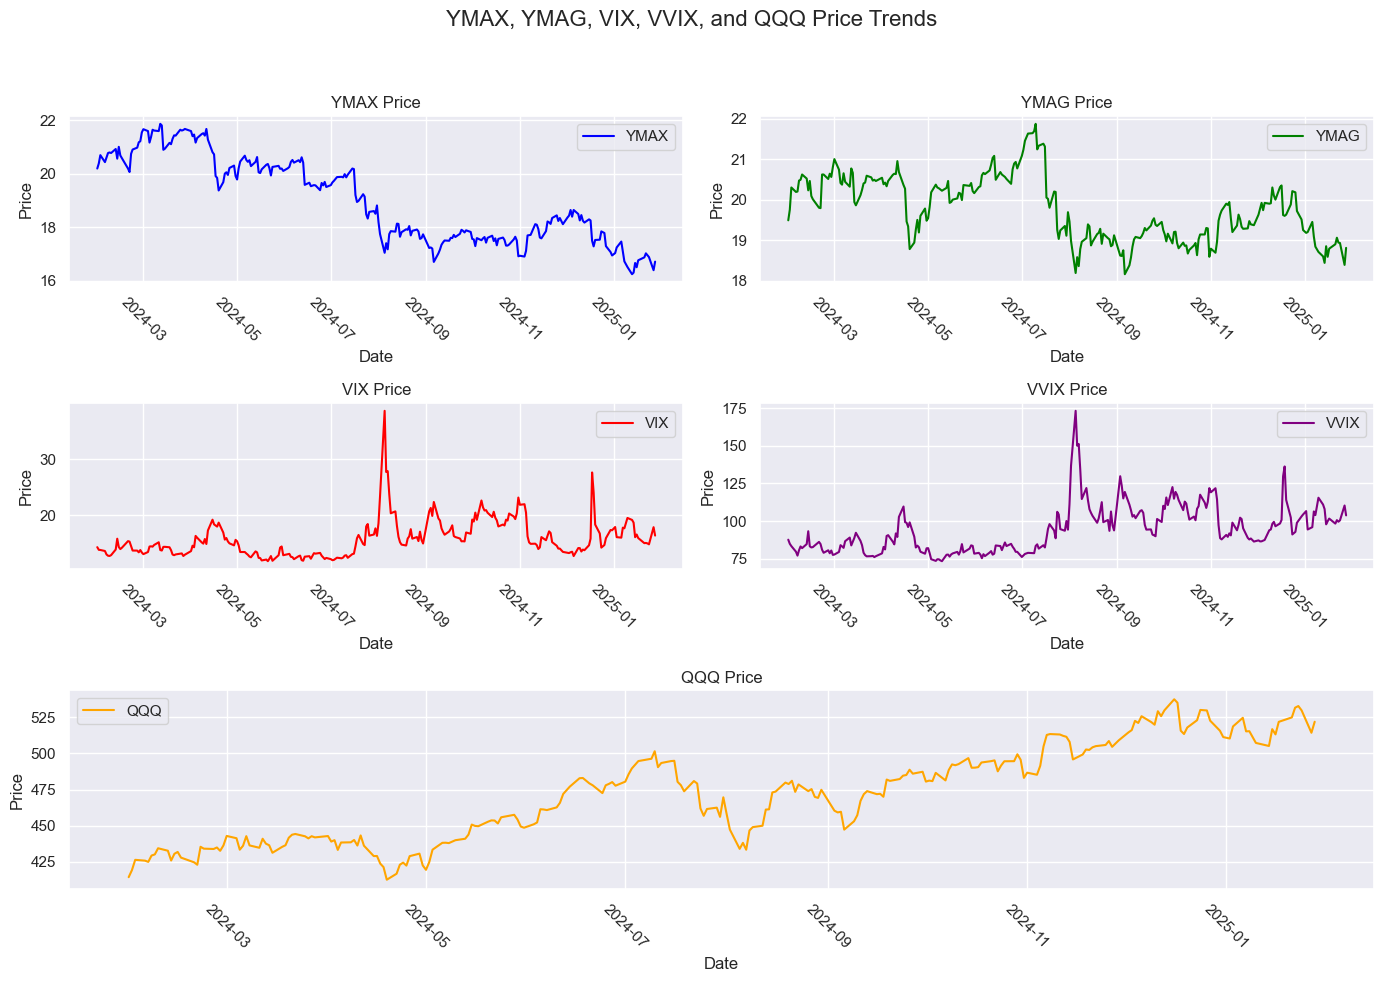

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define the colors for each asset
colors = {
    "YMAX": "blue",
    "YMAG": "green",
    "VIX": "red",
    "VVIX": "purple",
    "QQQ": "orange"
}

# Create a figure using GridSpec with 3 rows and 2 columns.
# The third row (for QQQ) will span both columns and be slightly taller.
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])

# First row: YMAX and YMAG side by side
ax_ymax = fig.add_subplot(gs[0, 0])
ax_ymag = fig.add_subplot(gs[0, 1])

# Second row: VIX and VVIX side by side
ax_vix = fig.add_subplot(gs[1, 0])
ax_vvix = fig.add_subplot(gs[1, 1])

# Third row: QQQ spanning both columns
ax_qqq = fig.add_subplot(gs[2, :])

# Plot YMAX Price
ax_ymax.plot(merged_df.index, merged_df["YMAX"], color=colors["YMAX"], label="YMAX")
ax_ymax.set_title("YMAX Price")
ax_ymax.set_xlabel("Date")
ax_ymax.set_ylabel("Price")
ax_ymax.legend()
ax_ymax.tick_params(axis='x', labelrotation=-45)

# Plot YMAG Price
ax_ymag.plot(merged_df.index, merged_df["YMAG"], color=colors["YMAG"], label="YMAG")
ax_ymag.set_title("YMAG Price")
ax_ymag.set_xlabel("Date")
ax_ymag.set_ylabel("Price")
ax_ymag.legend()
ax_ymag.tick_params(axis='x', labelrotation=-45)

# Plot VIX Price
ax_vix.plot(merged_df.index, merged_df["VIX"], color=colors["VIX"], label="VIX")
ax_vix.set_title("VIX Price")
ax_vix.set_xlabel("Date")
ax_vix.set_ylabel("Price")
ax_vix.legend()
ax_vix.tick_params(axis='x', labelrotation=-45)

# Plot VVIX Price
ax_vvix.plot(merged_df.index, merged_df["VVIX"], color=colors["VVIX"], label="VVIX")
ax_vvix.set_title("VVIX Price")
ax_vvix.set_xlabel("Date")
ax_vvix.set_ylabel("Price")
ax_vvix.legend()
ax_vvix.tick_params(axis='x', labelrotation=-45)

# Plot QQQ Price on the larger, spanning subplot
ax_qqq.plot(merged_df.index, merged_df["QQQ"], color=colors["QQQ"], label="QQQ")
ax_qqq.set_title("QQQ Price")
ax_qqq.set_xlabel("Date")
ax_qqq.set_ylabel("Price")
ax_qqq.legend()
ax_qqq.tick_params(axis='x', labelrotation=-45)

# Set an overall figure title and adjust layout to prevent overlaps
fig.suptitle("YMAX, YMAG, VIX, VVIX, and QQQ Price Trends", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [22]:
# Define rolling window size (e.g., 21 days)
window_size = 21

# Compute daily returns for each asset in merged_df
returns = merged_df.pct_change().dropna()

# Initialize stats_df with rolling volatilities
stats_df = pd.DataFrame(index=returns.index)

# Compute rolling volatilities (standard deviation of returns) for each asset
for column in merged_df.columns:
    stats_df[f"{column} Volatility"] = returns[column].rolling(window=window_size).std()

# Compute rolling correlations
stats_df["YMAX-VIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VIX"])
stats_df["YMAX-VVIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VVIX"])
stats_df["YMAG-VIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VIX"])
stats_df["YMAG-VVIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VVIX"])
stats_df["YMAX-QQQ Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["QQQ"])
stats_df["YMAG-QQQ Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["QQQ"])


# Drop NaN values resulting from rolling calculations
stats_df = stats_df.dropna()
stats_df

,YMAX Volatility,YMAG Volatility,VIX Volatility,VVIX Volatility,QQQ Volatility,YMAX-VIX Correlation,YMAX-VVIX Correlation,YMAG-VIX Correlation,YMAG-VVIX Correlation,YMAX-QQQ Correlation,YMAG-QQQ Correlation
Date,,,,,,,,,,,
2024-03-01,0.013069,0.013785,0.051710,0.043429,0.010393,-0.626499,-0.549622,-0.508677,-0.456559,0.754758,0.881939
2024-03-04,0.013071,0.014021,0.051693,0.043371,0.010300,-0.626533,-0.549422,-0.510632,-0.458702,0.755807,0.877316
2024-03-05,0.013642,0.013287,0.054021,0.045045,0.010663,-0.675417,-0.589907,-0.593275,-0.510036,0.777917,0.871641
2024-03-06,0.013392,0.013233,0.053891,0.043883,0.010716,-0.706867,-0.681932,-0.603820,-0.546858,0.792208,0.861685
2024-03-07,0.013522,0.013545,0.052771,0.043262,0.011108,-0.700723,-0.679942,-0.611949,-0.559811,0.810568,0.870032
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-22,0.014590,0.012203,0.091306,0.073777,0.011819,-0.647490,-0.617914,-0.637645,-0.556642,0.870044,0.879451
2025-01-23,0.014398,0.012251,0.088211,0.072508,0.011740,-0.727224,-0.605098,-0.658971,-0.565712,0.867249,0.882010
2025-01-24,0.014010,0.012234,0.072461,0.063766,0.011736,-0.742413,-0.578384,-0.763446,-0.611782,0.864446,0.872954


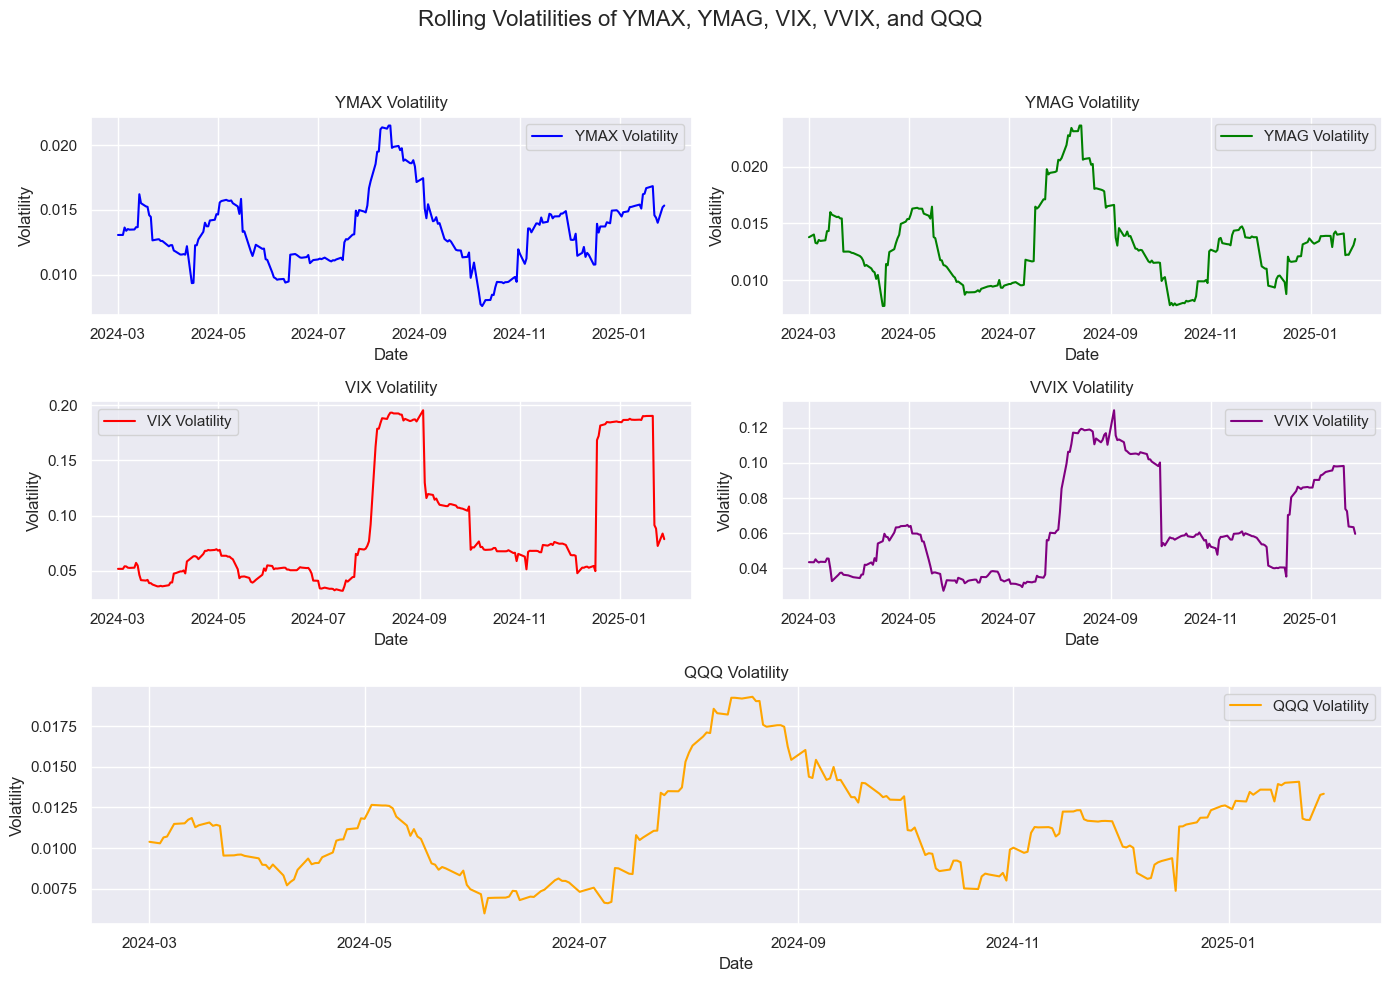

In [23]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define the colors for each asset
colors = {
    "YMAX": "blue",
    "YMAG": "green",
    "VIX": "red",
    "VVIX": "purple",
    "QQQ": "orange"
}

# Create a figure with GridSpec: 3 rows and 2 columns, where the third row will span both columns.
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])

# First row: YMAX and YMAG
ax_ymax = fig.add_subplot(gs[0, 0])
ax_ymag = fig.add_subplot(gs[0, 1])

# Second row: VIX and VVIX
ax_vix = fig.add_subplot(gs[1, 0])
ax_vvix = fig.add_subplot(gs[1, 1])

# Third row: QQQ spanning both columns
ax_qqq = fig.add_subplot(gs[2, :])

# Plot YMAX Volatility
ax_ymax.plot(stats_df.index, stats_df["YMAX Volatility"], color=colors["YMAX"], label="YMAX Volatility")
ax_ymax.set_title("YMAX Volatility")
ax_ymax.set_xlabel("Date")
ax_ymax.set_ylabel("Volatility")
ax_ymax.legend()

# Plot YMAG Volatility
ax_ymag.plot(stats_df.index, stats_df["YMAG Volatility"], color=colors["YMAG"], label="YMAG Volatility")
ax_ymag.set_title("YMAG Volatility")
ax_ymag.set_xlabel("Date")
ax_ymag.set_ylabel("Volatility")
ax_ymag.legend()

# Plot VIX Volatility
ax_vix.plot(stats_df.index, stats_df["VIX Volatility"], color=colors["VIX"], label="VIX Volatility")
ax_vix.set_title("VIX Volatility")
ax_vix.set_xlabel("Date")
ax_vix.set_ylabel("Volatility")
ax_vix.legend()

# Plot VVIX Volatility
ax_vvix.plot(stats_df.index, stats_df["VVIX Volatility"], color=colors["VVIX"], label="VVIX Volatility")
ax_vvix.set_title("VVIX Volatility")
ax_vvix.set_xlabel("Date")
ax_vvix.set_ylabel("Volatility")
ax_vvix.legend()

# Plot QQQ Volatility on a larger, spanning subplot
ax_qqq.plot(stats_df.index, stats_df["QQQ Volatility"], color=colors["QQQ"], label="QQQ Volatility")
ax_qqq.set_title("QQQ Volatility")
ax_qqq.set_xlabel("Date")
ax_qqq.set_ylabel("Volatility")
ax_qqq.legend()

# Set an overall title and adjust layout so that titles and labels don't overlap
fig.suptitle("Rolling Volatilities of YMAX, YMAG, VIX, VVIX, and QQQ", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


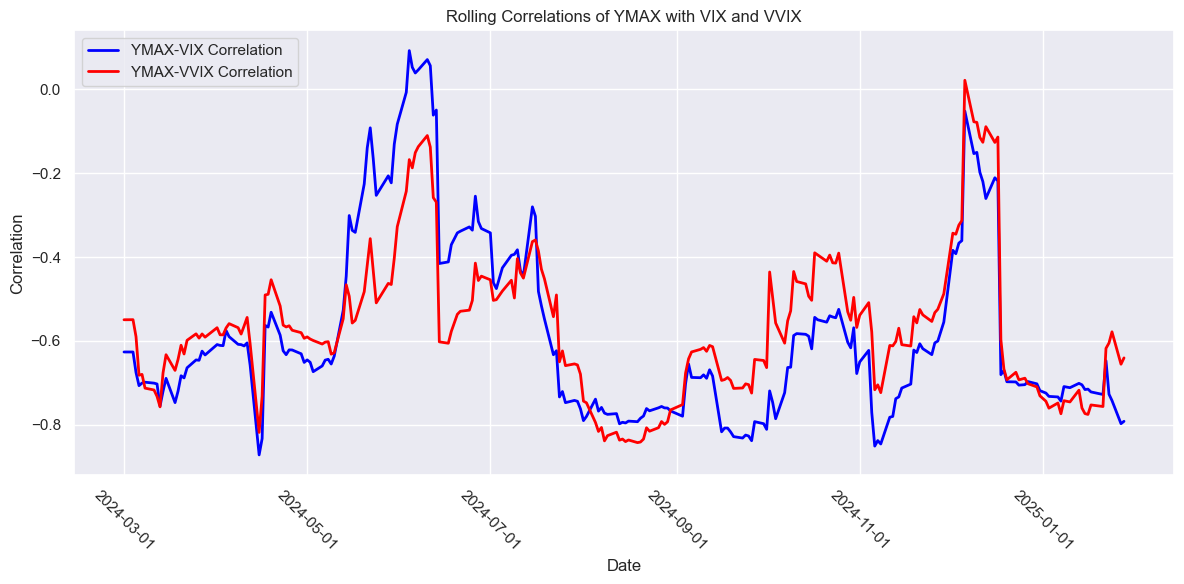

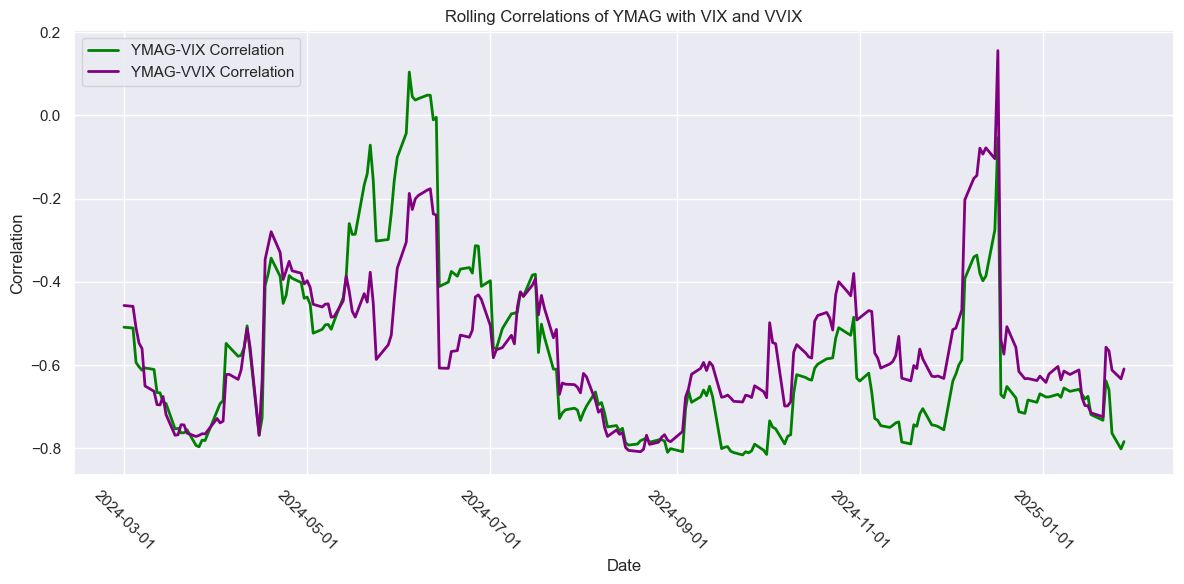

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Optional: for styling
import matplotlib.dates as mdates

# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
stats_df.index = pd.to_datetime(stats_df.index)

# -----------------------------
# Figure for YMAX correlations
# -----------------------------
fig_ymax, ax_ymax = plt.subplots(figsize=(12, 6))

# Plot YMAX-VIX Correlation (Blue)
ax_ymax.plot(stats_df.index, stats_df["YMAX-VIX Correlation"],
             color="blue", label="YMAX-VIX Correlation", linewidth=2)

# Plot YMAX-VVIX Correlation (Red)
ax_ymax.plot(stats_df.index, stats_df["YMAX-VVIX Correlation"],
             color="red", label="YMAX-VVIX Correlation", linewidth=2)

# Set title and axis labels
ax_ymax.set_title("Rolling Correlations of YMAX with VIX and VVIX")
ax_ymax.set_xlabel("Date")
ax_ymax.set_ylabel("Correlation")

# Format the x-axis with auto date locators and formatters
ax_ymax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax_ymax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)

# Position the legend at the top-left
ax_ymax.legend(loc="upper left")

plt.tight_layout()
plt.show()

# -----------------------------
# Figure for YMAG correlations
# -----------------------------
fig_ymag, ax_ymag = plt.subplots(figsize=(12, 6))

# Plot YMAG-VIX Correlation (Green)
ax_ymag.plot(stats_df.index, stats_df["YMAG-VIX Correlation"],
             color="green", label="YMAG-VIX Correlation", linewidth=2)

# Plot YMAG-VVIX Correlation (Purple)
ax_ymag.plot(stats_df.index, stats_df["YMAG-VVIX Correlation"],
             color="purple", label="YMAG-VVIX Correlation", linewidth=2)

# Set title and axis labels
ax_ymag.set_title("Rolling Correlations of YMAG with VIX and VVIX")
ax_ymag.set_xlabel("Date")
ax_ymag.set_ylabel("Correlation")

# Format the x-axis with auto date locators and formatters
ax_ymag.xaxis.set_major_locator(mdates.AutoDateLocator())
ax_ymag.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)

# Position the legend at the top-left
ax_ymag.legend(loc="upper left")

plt.tight_layout()
plt.show()


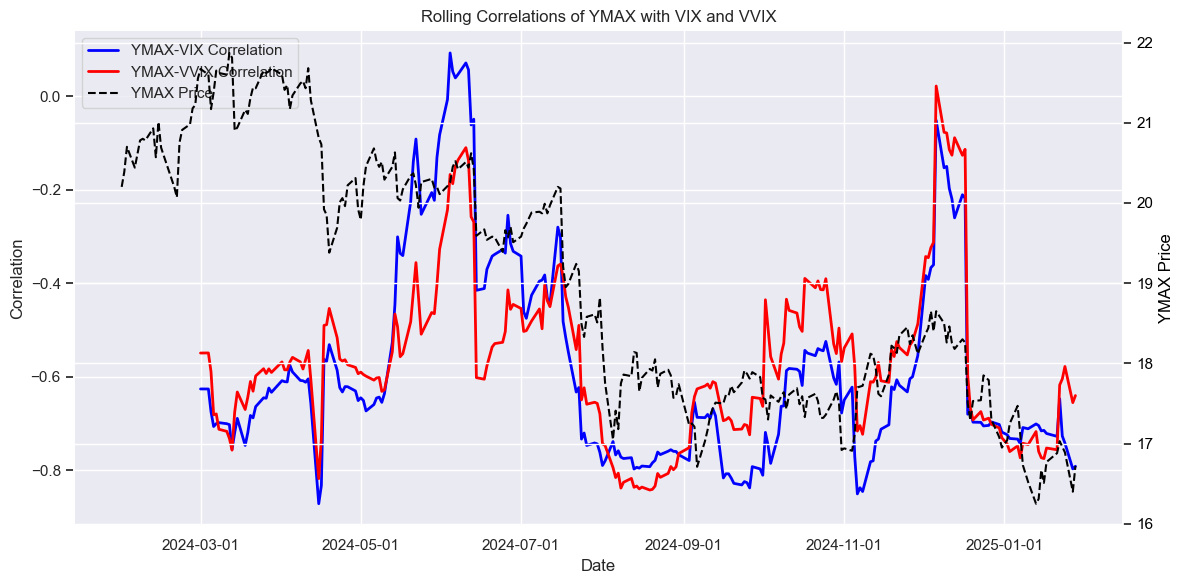

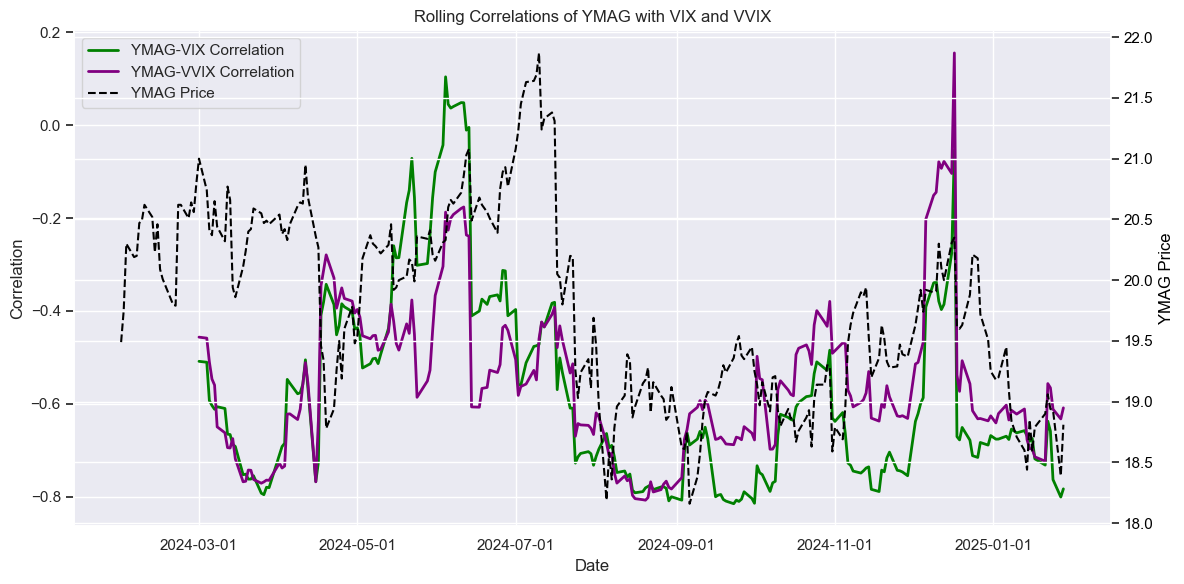

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
stats_df.index = pd.to_datetime(stats_df.index)
merged_df.index = pd.to_datetime(merged_df.index)

# -----------------------------
# Figure for YMAX correlations with overlaid YMAX price
# -----------------------------
fig_ymax, ax_ymax = plt.subplots(figsize=(12, 6))

# Plot YMAX-VIX Correlation (Blue)
ax_ymax.plot(stats_df.index, stats_df["YMAX-VIX Correlation"],
             color="blue", label="YMAX-VIX Correlation", linewidth=2)

# Plot YMAX-VVIX Correlation (Red)
ax_ymax.plot(stats_df.index, stats_df["YMAX-VVIX Correlation"],
             color="red", label="YMAX-VVIX Correlation", linewidth=2)

# Set title and axis labels
ax_ymax.set_title("Rolling Correlations of YMAX with VIX and VVIX")
ax_ymax.set_xlabel("Date")
ax_ymax.set_ylabel("Correlation")

# Create a second y-axis for YMAX Price
ax_ymax_price = ax_ymax.twinx()
ax_ymax_price.plot(merged_df.index, merged_df["YMAX"], color="black", linestyle="--", label="YMAX Price")
ax_ymax_price.set_ylabel("YMAX Price", color="black")
ax_ymax_price.tick_params(axis="y", labelcolor="black")

# Format the x-axis with auto date locators and formatters
ax_ymax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax_ymax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)

# Combine legends from both axes
lines1, labels1 = ax_ymax.get_legend_handles_labels()
lines2, labels2 = ax_ymax_price.get_legend_handles_labels()
ax_ymax.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

# -----------------------------
# Figure for YMAG correlations with overlaid YMAG price
# -----------------------------
fig_ymag, ax_ymag = plt.subplots(figsize=(12, 6))

# Plot YMAG-VIX Correlation (Green)
ax_ymag.plot(stats_df.index, stats_df["YMAG-VIX Correlation"],
             color="green", label="YMAG-VIX Correlation", linewidth=2)

# Plot YMAG-VVIX Correlation (Purple)
ax_ymag.plot(stats_df.index, stats_df["YMAG-VVIX Correlation"],
             color="purple", label="YMAG-VVIX Correlation", linewidth=2)

# Set title and axis labels
ax_ymag.set_title("Rolling Correlations of YMAG with VIX and VVIX")
ax_ymag.set_xlabel("Date")
ax_ymag.set_ylabel("Correlation")

# Create a second y-axis for YMAG Price
ax_ymag_price = ax_ymag.twinx()
ax_ymag_price.plot(merged_df.index, merged_df["YMAG"], color="black", linestyle="--", label="YMAG Price")
ax_ymag_price.set_ylabel("YMAG Price", color="black")
ax_ymag_price.tick_params(axis="y", labelcolor="black")

# Format the x-axis with auto date locators and formatters
ax_ymag.xaxis.set_major_locator(mdates.AutoDateLocator())
ax_ymag.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)

# Combine legends from both axes
lines1, labels1 = ax_ymag.get_legend_handles_labels()
lines2, labels2 = ax_ymag_price.get_legend_handles_labels()
ax_ymag.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()


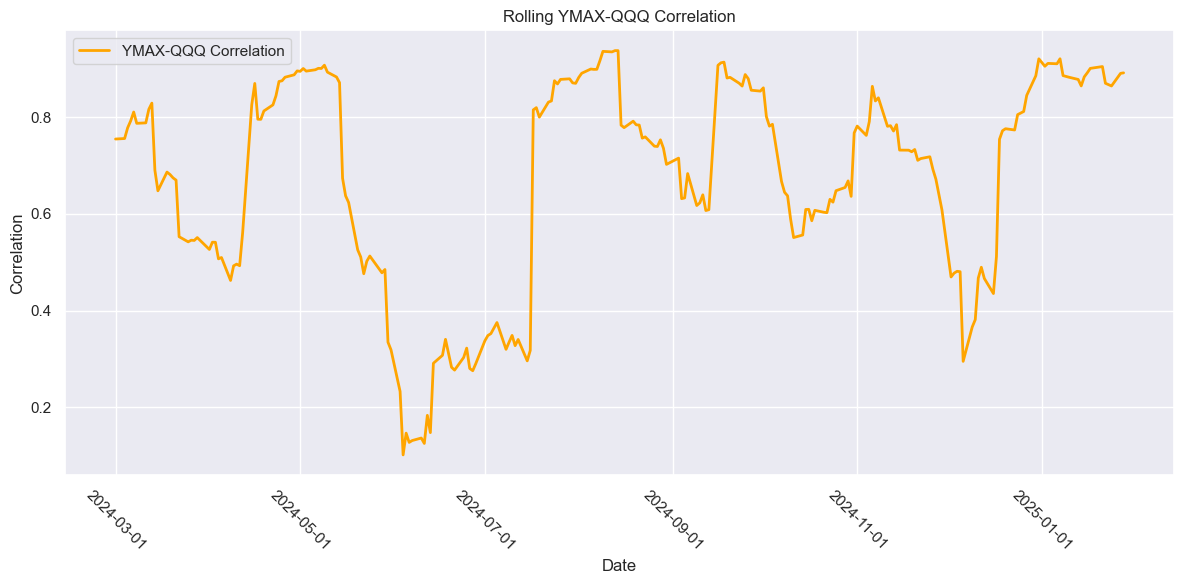

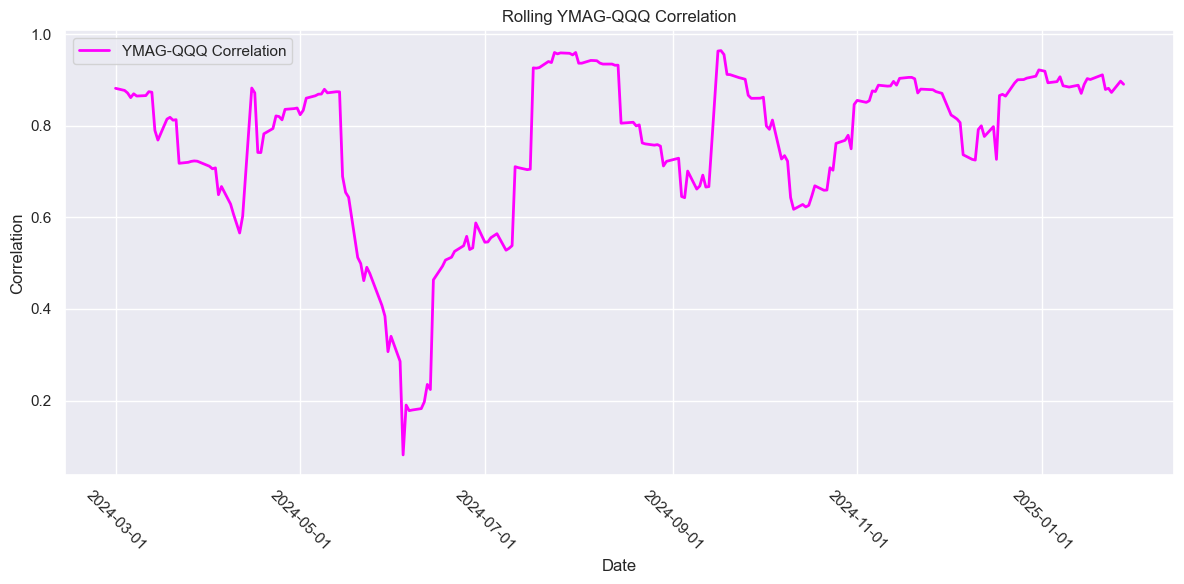

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
stats_df.index = pd.to_datetime(stats_df.index)

# -----------------------------
# Plot for YMAX-QQQ Correlation
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(stats_df.index, stats_df["YMAX-QQQ Correlation"],
         color="orange", linewidth=2, label="YMAX-QQQ Correlation")
plt.title("Rolling YMAX-QQQ Correlation")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot for YMAG-QQQ Correlation
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(stats_df.index, stats_df["YMAG-QQQ Correlation"],
         color="magenta", linewidth=2, label="YMAG-QQQ Correlation")
plt.title("Rolling YMAG-QQQ Correlation")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


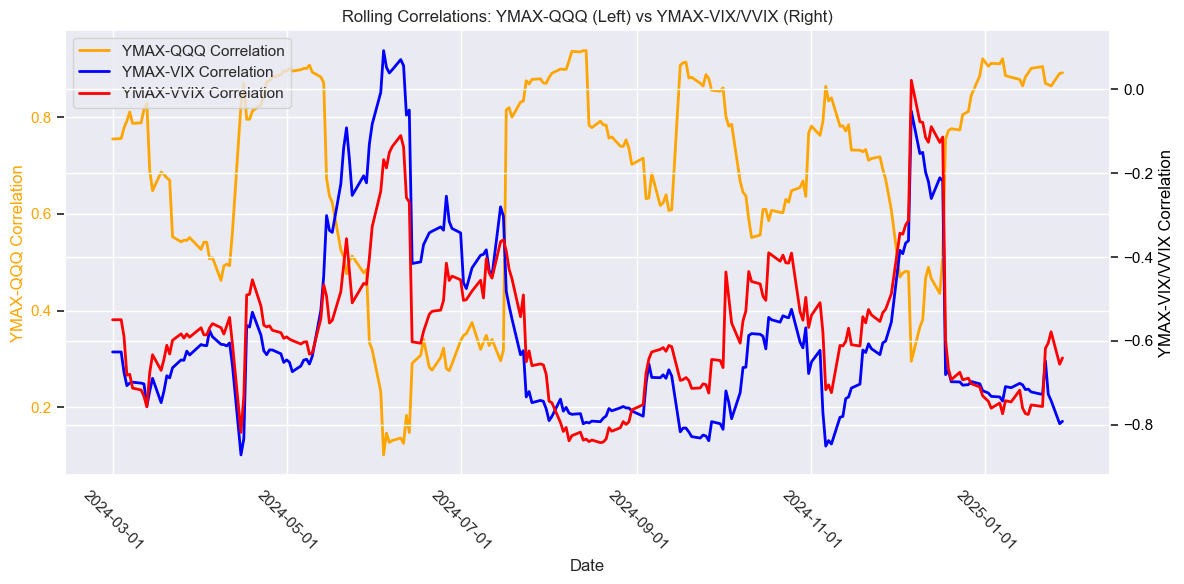

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
stats_df.index = pd.to_datetime(stats_df.index)

# Create the base figure and first axis (left y-axis)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot YMAX-QQQ Correlation on the left y-axis (in orange)
ax1.plot(stats_df.index, stats_df["YMAX-QQQ Correlation"],
         color="orange", linewidth=2, label="YMAX-QQQ Correlation")
ax1.set_xlabel("Date")
ax1.set_ylabel("YMAX-QQQ Correlation", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")

# Format the x-axis for dates
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)

# Create the second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot YMAX-VIX Correlation (in blue) and YMAX-VVIX Correlation (in red) on the right y-axis
ax2.plot(stats_df.index, stats_df["YMAX-VIX Correlation"],
         color="blue", linewidth=2, label="YMAX-VIX Correlation")
ax2.plot(stats_df.index, stats_df["YMAX-VVIX Correlation"],
         color="red", linewidth=2, label="YMAX-VVIX Correlation")
ax2.set_ylabel("YMAX-VIX/VVIX Correlation", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Set the plot title and adjust layout
plt.title("Rolling Correlations: YMAX-QQQ (Left) vs YMAX-VIX/VVIX (Right)")
plt.tight_layout()
plt.show()


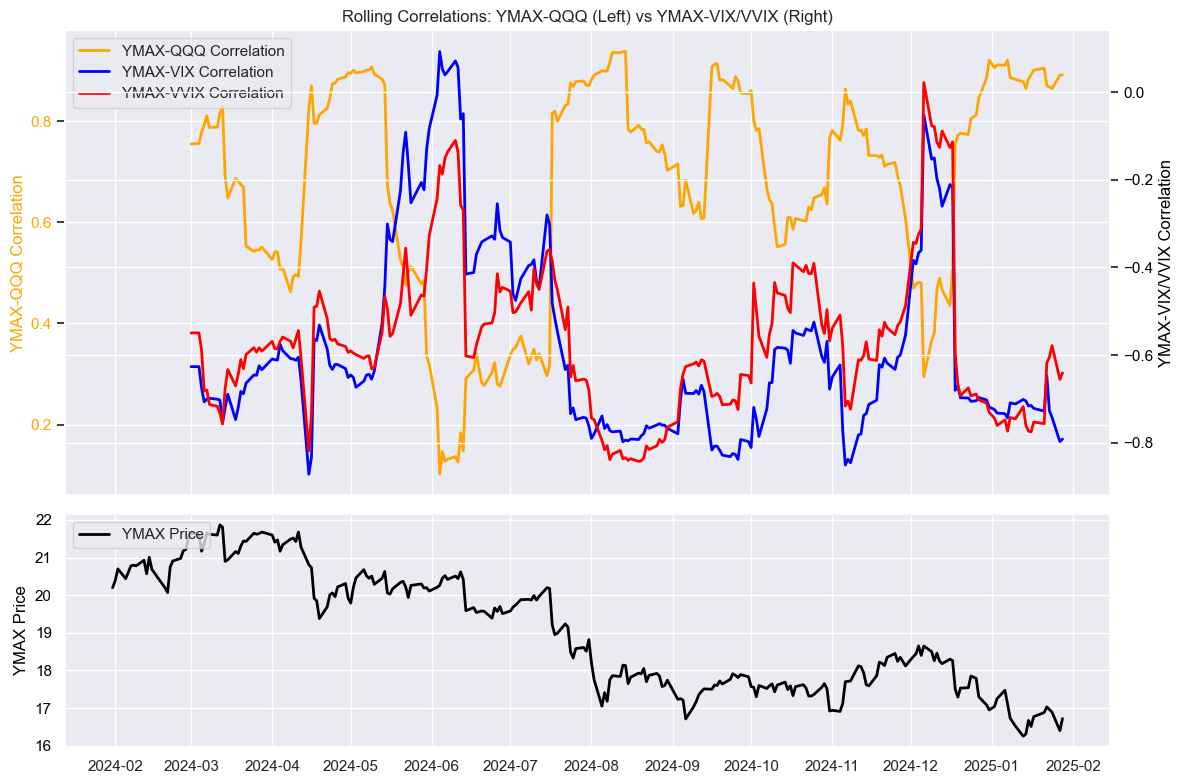

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
stats_df.index = pd.to_datetime(stats_df.index)
merged_df.index = pd.to_datetime(merged_df.index)

# Create figure with two subplots (one for correlations, one for YMAX price)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# -----------------------------
# First subplot: Correlations
# -----------------------------
ax1 = axes[0]  # Main correlation plot

# Plot YMAX-QQQ Correlation (Left Y-Axis)
ax1.plot(stats_df.index, stats_df["YMAX-QQQ Correlation"],
         color="orange", linewidth=2, label="YMAX-QQQ Correlation")
ax1.set_ylabel("YMAX-QQQ Correlation", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")

# Create secondary Y-Axis on the right for VIX/VVIX correlations
ax2 = ax1.twinx()
ax2.plot(stats_df.index, stats_df["YMAX-VIX Correlation"], color="blue", linewidth=2, label="YMAX-VIX Correlation")
ax2.plot(stats_df.index, stats_df["YMAX-VVIX Correlation"], color="red", linewidth=2, label="YMAX-VVIX Correlation")
ax2.set_ylabel("YMAX-VIX/VVIX Correlation", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Title for correlation subplot
ax1.set_title("Rolling Correlations: YMAX-QQQ (Left) vs YMAX-VIX/VVIX (Right)")

# -----------------------------
# Second subplot: YMAX Price
# -----------------------------
ax3 = axes[1]
ax3.plot(merged_df.index, merged_df["YMAX"], color="black", linewidth=2, label="YMAX Price")
ax3.set_ylabel("YMAX Price", color="black")
ax3.tick_params(axis="y", labelcolor="black")
ax3.legend(loc="upper left")

# -----------------------------
# Shared X-Axis Formatting
# -----------------------------
# Format the x-axis to show 1-month interval date blocks
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set to 1 month intervals
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


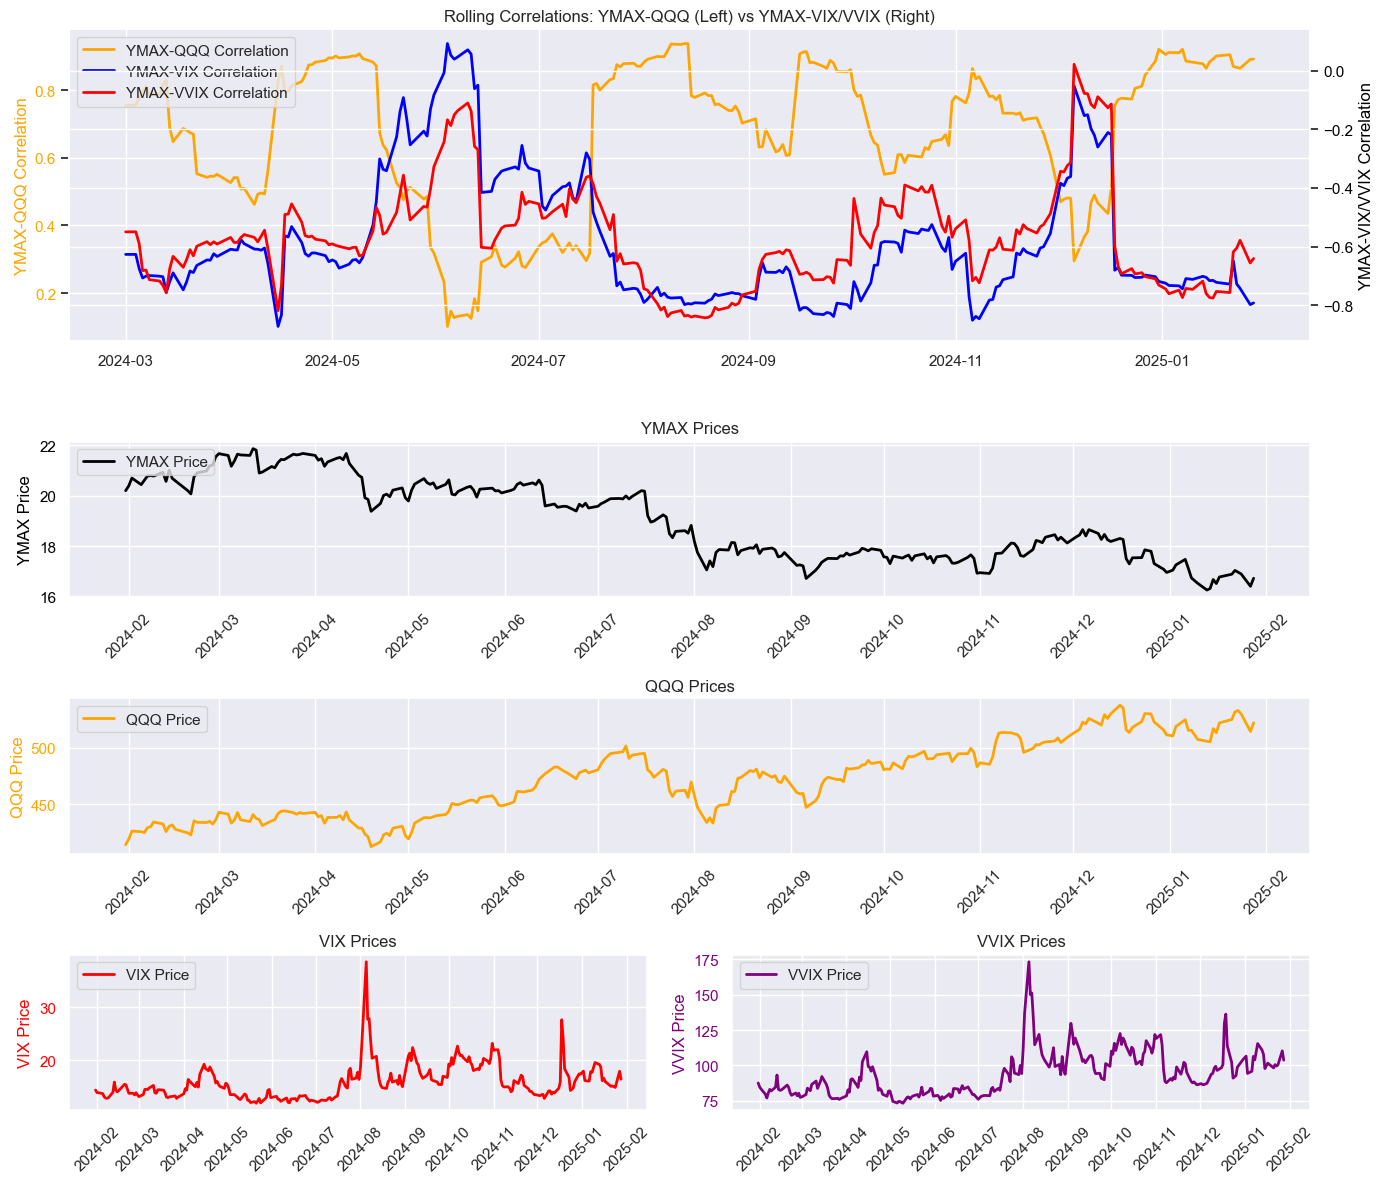

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.gridspec as gridspec

# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
stats_df.index = pd.to_datetime(stats_df.index)
merged_df.index = pd.to_datetime(merged_df.index)

# Create figure with GridSpec for improved layout control
fig = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(4, 2, height_ratios=[2, 1, 1, 1])  # Define 4 rows with correct height distribution

# -----------------------------
# First row: Correlation plot
# -----------------------------
ax1 = fig.add_subplot(gs[0, :])  # Spanning both columns

# Plot YMAX-QQQ Correlation (Left Y-Axis)
ax1.plot(stats_df.index, stats_df["YMAX-QQQ Correlation"],
         color="orange", linewidth=2, label="YMAX-QQQ Correlation")
ax1.set_ylabel("YMAX-QQQ Correlation", color="orange")
ax1.tick_params(axis="y", labelcolor="orange")

# Create secondary Y-Axis on the right for VIX/VVIX correlations
ax2 = ax1.twinx()
ax2.plot(stats_df.index, stats_df["YMAX-VIX Correlation"], color="blue", linewidth=2, label="YMAX-VIX Correlation")
ax2.plot(stats_df.index, stats_df["YMAX-VVIX Correlation"], color="red", linewidth=2, label="YMAX-VVIX Correlation")
ax2.set_ylabel("YMAX-VIX/VVIX Correlation", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Title for correlation subplot
ax1.set_title("Rolling Correlations: YMAX-QQQ (Left) vs YMAX-VIX/VVIX (Right)")

# -----------------------------
# Second row: YMAX Prices (Full Width)
# -----------------------------
ax3 = fig.add_subplot(gs[1, :])
ax3.plot(merged_df.index, merged_df["YMAX"], color="black", linewidth=2, label="YMAX Price")
ax3.set_ylabel("YMAX Price", color="black")
ax3.tick_params(axis="y", labelcolor="black")
ax3.legend(loc="upper left")
ax3.set_title("YMAX Prices")

# -----------------------------
# Third row: QQQ Prices (Full Width)
# -----------------------------
ax4 = fig.add_subplot(gs[2, :])
ax4.plot(merged_df.index, merged_df["QQQ"], color="orange", linewidth=2, label="QQQ Price")
ax4.set_ylabel("QQQ Price", color="orange")
ax4.tick_params(axis="y", labelcolor="orange")
ax4.legend(loc="upper left")
ax4.set_title("QQQ Prices")

# -----------------------------
# Fourth row: VIX and VVIX Prices (Side by Side)
# -----------------------------
ax5 = fig.add_subplot(gs[3, 0])  # VIX (Left)
ax5.plot(merged_df.index, merged_df["VIX"], color="red", linewidth=2, label="VIX Price")
ax5.set_ylabel("VIX Price", color="red")
ax5.tick_params(axis="y", labelcolor="red")
ax5.legend(loc="upper left")
ax5.set_title("VIX Prices")

ax6 = fig.add_subplot(gs[3, 1])  # VVIX (Right)
ax6.plot(merged_df.index, merged_df["VVIX"], color="purple", linewidth=2, label="VVIX Price")
ax6.set_ylabel("VVIX Price", color="purple")
ax6.tick_params(axis="y", labelcolor="purple")
ax6.legend(loc="upper left")
ax6.set_title("VVIX Prices")

# -----------------------------
# Shared X-Axis Formatting
# -----------------------------
for ax in [ax3, ax4, ax5, ax6]:  # Apply formatting to all x-axes
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set to 1 month intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


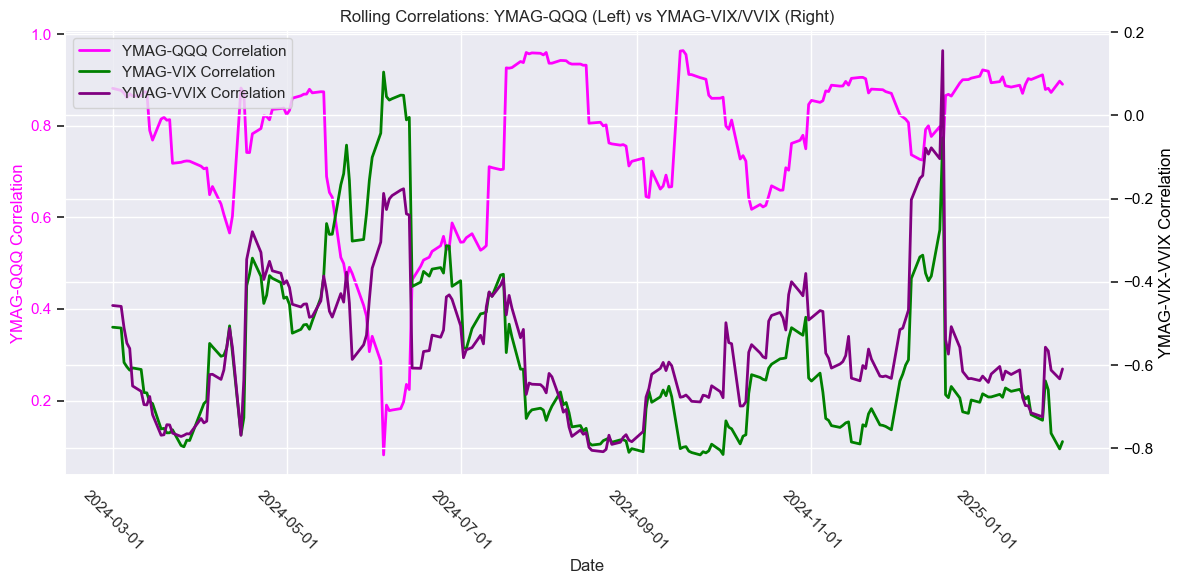

In [30]:
# Optional: Set a dark-themed style similar to Plotly's dark mode
sns.set_theme(style="darkgrid")

# Ensure the DataFrame index is in datetime format
stats_df.index = pd.to_datetime(stats_df.index)

# Create the base figure and first axis (left y-axis)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot YMAG-QQQ Correlation on the left y-axis (magenta)
ax1.plot(stats_df.index, stats_df["YMAG-QQQ Correlation"],
         color="magenta", linewidth=2, label="YMAG-QQQ Correlation")
ax1.set_xlabel("Date")
ax1.set_ylabel("YMAG-QQQ Correlation", color="magenta")
ax1.tick_params(axis="y", labelcolor="magenta")

# Format the x-axis for dates
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=-45)

# Create the second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot YMAG-VIX Correlation (green) and YMAG-VVIX Correlation (purple) on the right y-axis
ax2.plot(stats_df.index, stats_df["YMAG-VIX Correlation"],
         color="green", linewidth=2, label="YMAG-VIX Correlation")
ax2.plot(stats_df.index, stats_df["YMAG-VVIX Correlation"],
         color="purple", linewidth=2, label="YMAG-VVIX Correlation")
ax2.set_ylabel("YMAG-VIX-VVIX Correlation", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Set the plot title and adjust layout
plt.title("Rolling Correlations: YMAG-QQQ (Left) vs YMAG-VIX/VVIX (Right)")
plt.tight_layout()
plt.show()


In [31]:
# correlation of them all against each other
merged_df.corr()

,YMAX,YMAG,VIX,VVIX,QQQ
YMAX,1.000000,0.797942,-0.595510,-0.733907,-0.700428
YMAG,0.797942,1.000000,-0.705460,-0.742475,-0.230507
VIX,-0.595510,-0.705460,1.000000,0.938882,0.083769
VVIX,-0.733907,-0.742475,0.938882,1.000000,0.278904
QQQ,-0.700428,-0.230507,0.083769,0.278904,1.000000


The above analysis presents visualizations of the volatilities and correlations of the assets. We have both the overall correlations and the rolling correlations, the rolling correlations help track how asset relationships change over time, revealing shifts in market dynamics and risk exposure. Unlike static correlations, they adapt to different market conditions, aiding in diversification and hedging strategies. A sudden rise in correlation may signal market stress, while a drop can indicate idiosyncratic movements.

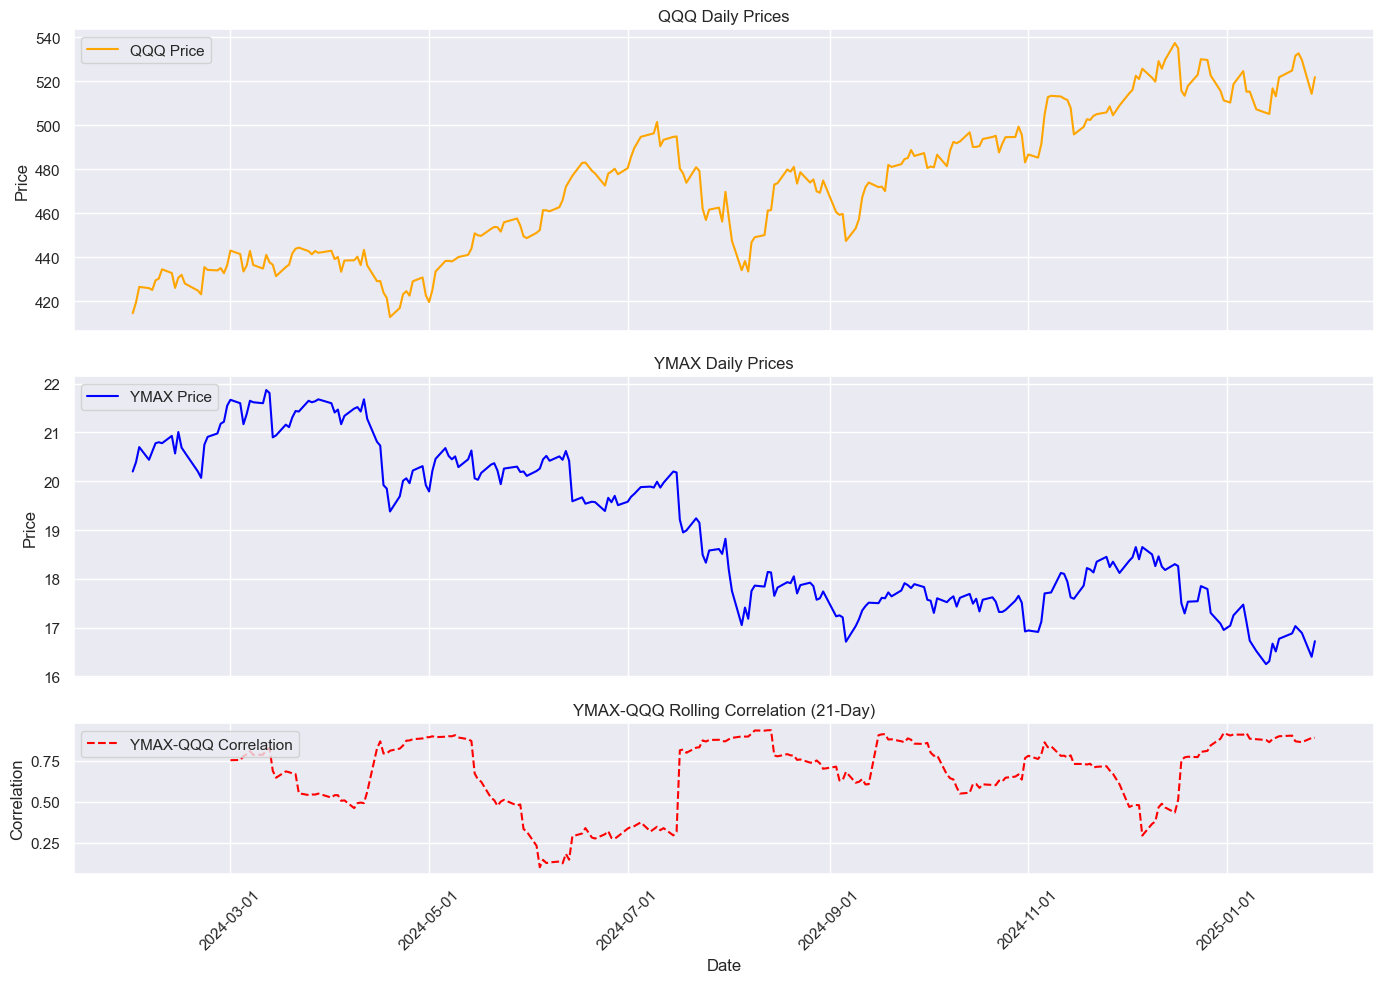

In [32]:
# Ensure the daily DataFrame index is in datetime format
merged_df.index = pd.to_datetime(merged_df.index)
stats_df.index = pd.to_datetime(stats_df.index)

# Create figure and axes for YMAX
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 2, 1]})

# Plot QQQ Daily Prices (Top)
axes[0].plot(merged_df.index, merged_df["QQQ"], color="orange", label="QQQ Price")
axes[0].set_title("QQQ Daily Prices")
axes[0].set_ylabel("Price")
axes[0].legend(loc="upper left")

# Plot YMAX Daily Prices (Middle)
axes[1].plot(merged_df.index, merged_df["YMAX"], color="blue", label="YMAX Price")
axes[1].set_title("YMAX Daily Prices")
axes[1].set_ylabel("Price")
axes[1].legend(loc="upper left")

# Plot YMAX-QQQ Rolling Correlation (Bottom)
axes[2].plot(stats_df.index, stats_df["YMAX-QQQ Correlation"], color="red", linestyle="--", label="YMAX-QQQ Correlation")
axes[2].set_title("YMAX-QQQ Rolling Correlation (21-Day)")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Correlation")
axes[2].legend(loc="upper left")

# Format x-axis with date labels
axes[2].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


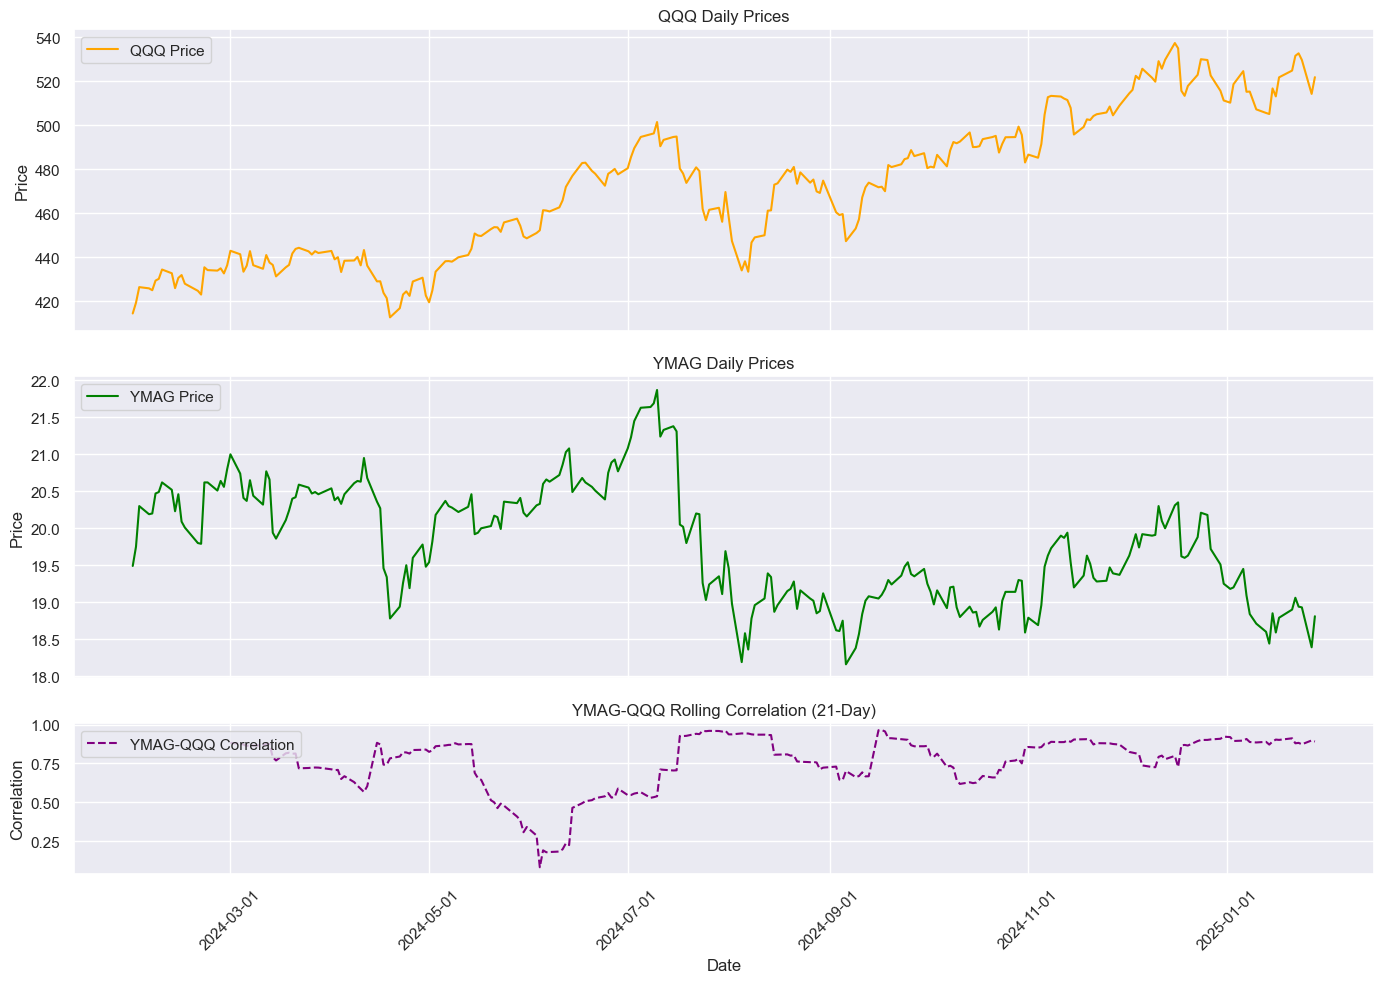

In [33]:
# Ensure the daily DataFrame index is in datetime format
merged_df.index = pd.to_datetime(merged_df.index)
stats_df.index = pd.to_datetime(stats_df.index)

# Create figure and axes for YMAG
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 2, 1]})

# Plot QQQ Daily Prices (Top)
axes[0].plot(merged_df.index, merged_df["QQQ"], color="orange", label="QQQ Price")
axes[0].set_title("QQQ Daily Prices")
axes[0].set_ylabel("Price")
axes[0].legend(loc="upper left")

# Plot YMAG Daily Prices (Middle)
axes[1].plot(merged_df.index, merged_df["YMAG"], color="green", label="YMAG Price")
axes[1].set_title("YMAG Daily Prices")
axes[1].set_ylabel("Price")
axes[1].legend(loc="upper left")

# Plot YMAG-QQQ Rolling Correlation (Bottom)
axes[2].plot(stats_df.index, stats_df["YMAG-QQQ Correlation"], color="purple", linestyle="--", label="YMAG-QQQ Correlation")
axes[2].set_title("YMAG-QQQ Rolling Correlation (21-Day)")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Correlation")
axes[2].legend(loc="upper left")

# Format x-axis with date labels
axes[2].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


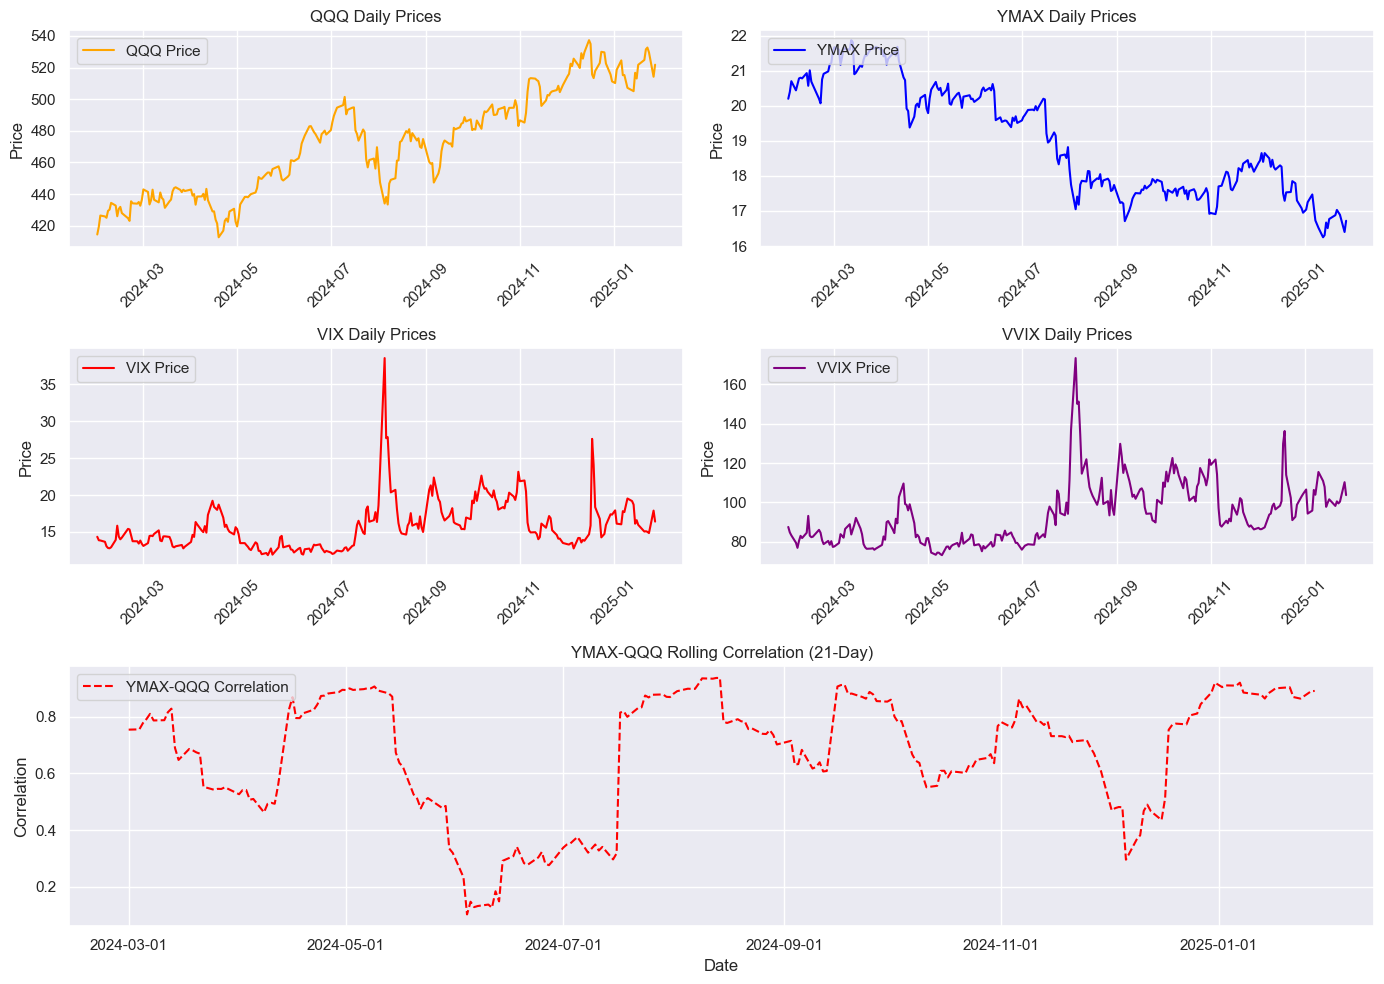

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import pandas as pd

# Ensure the daily DataFrame index is in datetime format
merged_df.index = pd.to_datetime(merged_df.index)
stats_df.index = pd.to_datetime(stats_df.index)

# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])

# First row: QQQ (left) and YMAX (right)
ax_qqq = fig.add_subplot(gs[0, 0])
ax_ymax = fig.add_subplot(gs[0, 1])

# Second row: VIX (left) and VVIX (right)
ax_vix = fig.add_subplot(gs[1, 0])
ax_vvix = fig.add_subplot(gs[1, 1])

# Third row: YMAX-QQQ Rolling Correlation spanning both columns
ax_correlation = fig.add_subplot(gs[2, :])

# Plot QQQ Daily Prices
ax_qqq.plot(merged_df.index, merged_df["QQQ"], color="orange", label="QQQ Price")
ax_qqq.set_title("QQQ Daily Prices")
ax_qqq.set_ylabel("Price")
ax_qqq.legend(loc="upper left")
ax_qqq.tick_params(axis='x', labelrotation=45)

# Plot YMAX Daily Prices
ax_ymax.plot(merged_df.index, merged_df["YMAX"], color="blue", label="YMAX Price")
ax_ymax.set_title("YMAX Daily Prices")
ax_ymax.set_ylabel("Price")
ax_ymax.legend(loc="upper left")
ax_ymax.tick_params(axis='x', labelrotation=45)

# Plot VIX Daily Prices
ax_vix.plot(merged_df.index, merged_df["VIX"], color="red", label="VIX Price")
ax_vix.set_title("VIX Daily Prices")
ax_vix.set_ylabel("Price")
ax_vix.legend(loc="upper left")
ax_vix.tick_params(axis='x', labelrotation=45)

# Plot VVIX Daily Prices
ax_vvix.plot(merged_df.index, merged_df["VVIX"], color="purple", label="VVIX Price")
ax_vvix.set_title("VVIX Daily Prices")
ax_vvix.set_ylabel("Price")
ax_vvix.legend(loc="upper left")
ax_vvix.tick_params(axis='x', labelrotation=45)

# Plot YMAX-QQQ Rolling Correlation
ax_correlation.plot(stats_df.index, stats_df["YMAX-QQQ Correlation"], color="red", linestyle="--", label="YMAX-QQQ Correlation")
ax_correlation.set_title("YMAX-QQQ Rolling Correlation (21-Day)")
ax_correlation.set_xlabel("Date")
ax_correlation.set_ylabel("Correlation")
ax_correlation.legend(loc="upper left")

# Format x-axis dates for all subplots
ax_correlation.xaxis.set_major_locator(mdates.AutoDateLocator())
ax_correlation.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Adjust layout
plt.tight_layout()
plt.show()


## Monthly Data Analysis

In [35]:
# Import YMAX ETF Stock Price History (Monthly).csv
ymax_monthly_df = pd.read_csv("YMAX ETF Stock Price History (Monthly).csv", 
                      index_col="Date",    
                      parse_dates=True)     # Parse the index as datetime

# Import YMAG ETF Stock Price History (Monthly).csv
ymag_monthly_df = pd.read_csv("YMAG ETF Stock Price History (Monthly).csv", 
                      index_col="Date", 
                      parse_dates=True)

# Display information about the YMAX ETF Stock Price History DataFrame,
# including column names, data types, and non-null counts.
print("YMAX ETF Stock Price History Info:")
ymax_monthly_df.info()

# Display information about the YMAG ETF Stock Price History DataFrame,
# including column names, data types, and non-null counts.
print("\nYMAG ETF Stock Price History Info:")
ymag_monthly_df.info()


YMAX ETF Stock Price History Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2025-01-01 to 2024-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     12 non-null     float64
 1   Open      12 non-null     float64
 2   High      12 non-null     float64
 3   Low       12 non-null     float64
 4   Vol.      12 non-null     object 
 5   Change %  12 non-null     object 
dtypes: float64(4), object(2)
memory usage: 672.0+ bytes

YMAG ETF Stock Price History Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2025-01-01 to 2024-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     12 non-null     float64
 1   Open      12 non-null     float64
 2   High      12 non-null     float64
 3   Low       12 non-null     float64
 4   Vol.      12 non-null     object 
 5   Change %  12 non-null     object 
dtyp

In [36]:
# Drop the 'Vol.' and 'Change %' columns from YMAX and YMAG DataFrames
ymax_monthly_df = ymax_monthly_df.drop(columns=['Vol.', 'Change %'])
ymag_monthly_df = ymag_monthly_df.drop(columns=['Vol.', 'Change %'])


In [37]:
# Drop Open, High, Low columns and rename Price to YMAX in the YMAX monthly DataFrame
ymax = ymax_monthly_df.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAX'})

# Drop Open, High, Low columns and rename Price to YMAG in the YMAG monthly DataFrame
ymag = ymag_monthly_df.drop(columns=['Open', 'High', 'Low']).rename(columns={'Price': 'YMAG'})

# Ensure the Date index is set properly and remove any residual "Date" columns if present
if 'Date' in ymax.columns:
    ymax = ymax.drop(columns=['Date'])
if 'Date' in ymag.columns:
    ymag = ymag.drop(columns=['Date'])

# Merge both DataFrames on the Date index
ymax_ymag_monthly_merged = pd.merge(ymax, ymag, left_index=True, right_index=True, how='inner')
ymax_ymag_monthly_merged = ymax_ymag_monthly_merged.copy()

# Display the merged DataFrame
print(ymax_ymag_monthly_merged.head())


             YMAX   YMAG
Date                    
2025-01-01  16.60  18.57
2024-12-01  16.95  19.25
2024-11-01  18.12  19.37
2024-10-01  16.92  18.59
2024-09-01  17.83  19.45


In [38]:
# Download monthly data of VIX, VVIX, and QQQ ETF
VVIX_monthly = yf.download('^VVIX', start='2024-01-01', end='2025-01-30', interval='1mo')
QQQ_monthly = yf.download('QQQ', start='2024-01-01', end='2025-01-30', interval='1mo')

# Rename the columns for consistency
VVIX_monthly.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
QQQ_monthly.columns = ['Close', 'High', 'Low', 'Open', 'Volume']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [39]:
# Rename "Close" column for VVIX and QQQ, keeping only the "Close" column
VVIX_monthly = VVIX_monthly[['Close']].rename(columns={'Close': 'VVIX'})
QQQ_monthly = QQQ_monthly[['Close']].rename(columns={'Close': 'QQQ'})

# Merge the VVIX and QQQ DataFrames on the Date index (VIX is omitted)
merged_monthly_vvix_qqq_df = VVIX_monthly.merge(
    QQQ_monthly, left_index=True, right_index=True, how='outer'
)

# Merge the resulting VVIX and QQQ DataFrame with the ymax_ymag_monthly_merged DataFrame
merged_monthly_vvix_qqq_df = ymax_ymag_monthly_merged.merge(
    merged_monthly_vvix_qqq_df, left_index=True, right_index=True, how='outer'
)

# Drop any rows with missing values
merged_monthly_vvix_qqq_df = merged_monthly_vvix_qqq_df.dropna()

# Display the merged DataFrame
merged_monthly_vvix_qqq_df


,YMAX,YMAG,VVIX,QQQ
Date,,,,
2024-02-01,21.55,20.80,77.449997,436.406586
2024-03-01,21.68,20.46,76.570000,441.386963
2024-04-01,19.92,19.48,81.820000,422.639832
2024-05-01,20.11,20.16,78.269997,448.639832
2024-06-01,19.51,20.77,79.480003,476.909393
2024-07-01,18.82,19.69,94.250000,469.651642
2024-08-01,17.74,19.12,93.730003,474.835968
2024-09-01,17.83,19.45,99.339996,486.600433
2024-10-01,16.92,18.59,121.889999,483.071045


In [40]:
# Define rolling window size (e.g., 2 periods for rolling volatility)
window_size = 4

# Compute daily returns for each asset in merged_monthly_vvix_qqq_df
returns = merged_monthly_vvix_qqq_df.pct_change().dropna()

# Initialize stats_df with rolling volatilities
stats_df = pd.DataFrame(index=returns.index)

# Compute rolling volatilities (standard deviation of returns) for each asset
for column in merged_monthly_vvix_qqq_df.columns:
    stats_df[f"{column} Volatility"] = returns[column].rolling(window=window_size).std()

# Compute rolling correlations
stats_df["YMAX-VVIX Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["VVIX"])
stats_df["YMAG-VVIX Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["VVIX"])
stats_df["YMAX-QQQ Correlation"] = returns["YMAX"].rolling(window=window_size).corr(returns["QQQ"])
stats_df["YMAG-QQQ Correlation"] = returns["YMAG"].rolling(window=window_size).corr(returns["QQQ"])

# Drop NaN values resulting from rolling calculations
stats_df = stats_df.dropna()
stats_df


,YMAX Volatility,YMAG Volatility,VVIX Volatility,QQQ Volatility,YMAX-VVIX Correlation,YMAG-VVIX Correlation,YMAX-QQQ Correlation,YMAG-QQQ Correlation
Date,,,,,,,,
2024-06-01,0.042152,0.039561,0.047390,0.050017,-0.969708,-0.738194,0.704184,0.990594
2024-07-01,0.037151,0.047716,0.097527,0.053770,-0.484437,-0.861515,0.830922,0.969203
2024-08-01,0.027869,0.043258,0.101457,0.038675,-0.332912,-0.755628,0.622517,0.996340
2024-09-01,0.025868,0.038626,0.085731,0.032610,0.164856,-0.590489,0.239757,0.927485
2024-10-01,0.028071,0.031005,0.108188,0.018031,-0.146695,-0.586788,0.568573,0.942062
2024-11-01,0.059696,0.040012,0.216235,0.025610,-0.819800,-0.813883,0.942501,0.962901
2024-12-01,0.061745,0.036662,0.240438,0.026900,-0.975202,-0.869315,0.970211,0.950599
2025-01-01,0.061001,0.038827,0.243277,0.026794,-0.972319,-0.753018,0.954282,0.806905


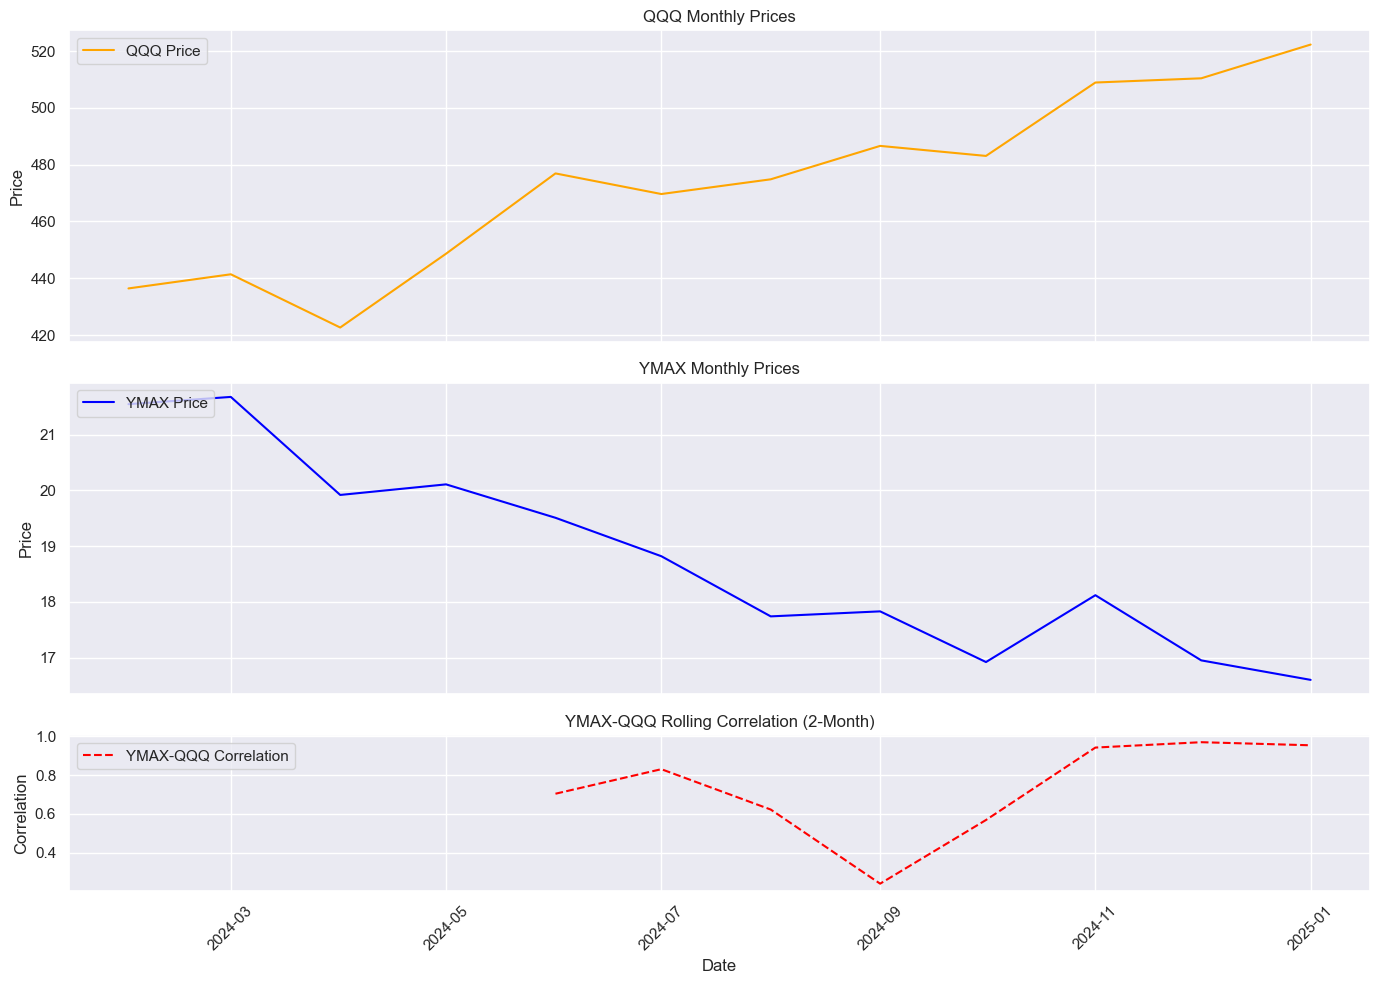

In [41]:
# Ensure the DataFrame index is in datetime format
merged_monthly_vvix_qqq_df.index = pd.to_datetime(merged_monthly_vvix_qqq_df.index)
stats_df.index = pd.to_datetime(stats_df.index)

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 2, 1]})

# Plot QQQ Monthly Prices (Top)
axes[0].plot(merged_monthly_vvix_qqq_df.index, merged_monthly_vvix_qqq_df["QQQ"], color="orange", label="QQQ Price")
axes[0].set_title("QQQ Monthly Prices")
axes[0].set_ylabel("Price")
axes[0].legend(loc="upper left")

# Plot YMAX Monthly Prices (Middle)
axes[1].plot(merged_monthly_vvix_qqq_df.index, merged_monthly_vvix_qqq_df["YMAX"], color="blue", label="YMAX Price")
axes[1].set_title("YMAX Monthly Prices")
axes[1].set_ylabel("Price")
axes[1].legend(loc="upper left")

# Plot YMAX-QQQ Rolling Correlation (Bottom)
axes[2].plot(stats_df.index, stats_df["YMAX-QQQ Correlation"], color="red", linestyle="--", label="YMAX-QQQ Correlation")
axes[2].set_title("YMAX-QQQ Rolling Correlation (2-Month)")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Correlation")
axes[2].legend(loc="upper left")

# Format x-axis with date labels
axes[2].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


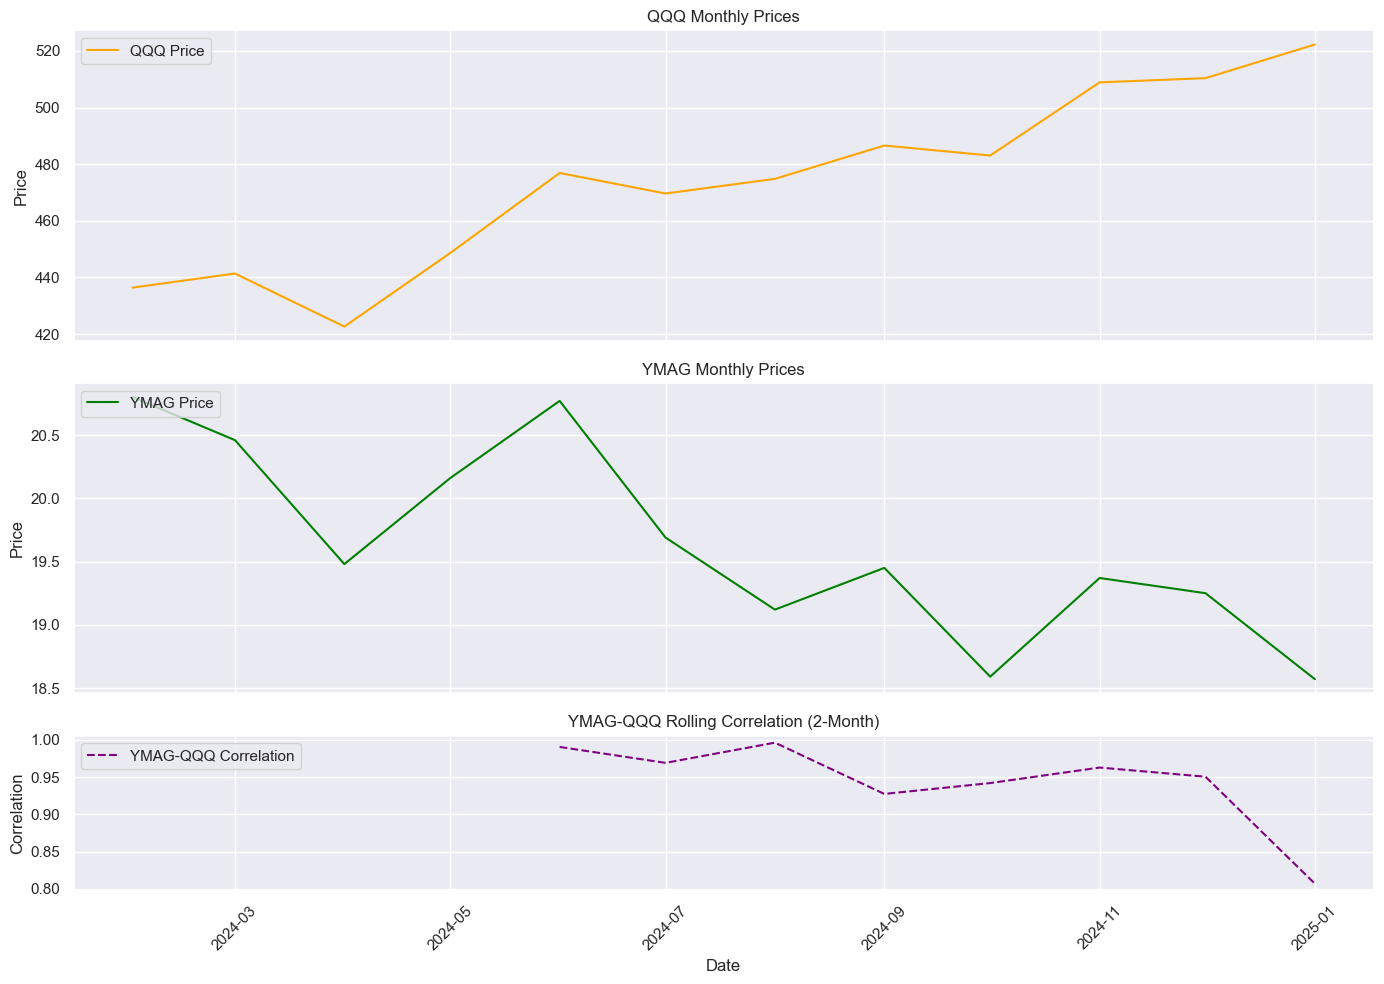

In [42]:
# Ensure the DataFrame index is in datetime format
merged_monthly_vvix_qqq_df.index = pd.to_datetime(merged_monthly_vvix_qqq_df.index)
stats_df.index = pd.to_datetime(stats_df.index)

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 2, 1]})

# Plot QQQ Monthly Prices (Top)
axes[0].plot(merged_monthly_vvix_qqq_df.index, merged_monthly_vvix_qqq_df["QQQ"], color="orange", label="QQQ Price")
axes[0].set_title("QQQ Monthly Prices")
axes[0].set_ylabel("Price")
axes[0].legend(loc="upper left")

# Plot YMAG Monthly Prices (Middle)
axes[1].plot(merged_monthly_vvix_qqq_df.index, merged_monthly_vvix_qqq_df["YMAG"], color="green", label="YMAG Price")
axes[1].set_title("YMAG Monthly Prices")
axes[1].set_ylabel("Price")
axes[1].legend(loc="upper left")

# Plot YMAG-QQQ Rolling Correlation (Bottom)
axes[2].plot(stats_df.index, stats_df["YMAG-QQQ Correlation"], color="purple", linestyle="--", label="YMAG-QQQ Correlation")
axes[2].set_title("YMAG-QQQ Rolling Correlation (2-Month)")
axes[2].set_xlabel("Date")
axes[2].set_ylabel("Correlation")
axes[2].legend(loc="upper left")

# Format x-axis with date labels
axes[2].xaxis.set_major_locator(mdates.AutoDateLocator())
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
